<h1> Utility Functions

In [1]:
import warnings
warnings.filterwarnings('ignore')
def plotCorr(df):
    """Derives & plots correlation between supplied series"""
    try:
        oCorr = df.corr()
        fig, ax = plt.subplots(figsize=(size, size))
        ax.matshow(oCorr)
        plt.yticks(range(len(oCorr.columns)), oCorr.columns);
        plt.xticks(range(len(oCorr.columns)), oCorr.columns);
        #sns.heatmap(oCorr, xticklabels=oCorr.columns.values, yticklabels=oCorr.columns.values)
        #oCorr.style.background_gradient(cmap='coolwarm').set_precision(2)
    except:
        pass

#######################################

def plotCorrSNSreg(df):
    """Derives & fit a reg along with distribution between supplied series"""
    try:
        x = sns.pairplot(df.dropna(), diag_kind="kde", kind="reg")
        #x.map_lower(corrfunc)
        plt.show()
    except:
        pass
    
#######################################
    
def plotCorrSNSvalue(df, x):
    """Derives & plots correlation between supplied series"""
    try:
        plt.figure(figsize=(15,15))
        sns.heatmap(df.dropna().corr(), annot=x)
        plt.show()
    except:
        pass

#######################################   
    
def nullPer(df):
    """Quantifies missing values"""
    try:        
        return(df.isnull().mean()*100)
    except:
        pass

#######################################

def uniVar(x):
    """Computes univariate matrics"""
    try: 
        print(x.describe())
        print("Skewness: %f" % x.skew())
        print("Kurtosis: %f" % x.kurt())
    except:
        pass
    
#######################################

def edaScatter(x):
    """Renders Scatter plot (Multivariate)"""
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    try:    
        for i in range(1, len(yDF.columns)):
            fig.add_subplot(5, 5, i)
            plt.scatter(x=xDF[x], y=yDF.iloc[:, i], alpha=0.5)
            plt.title(yDF.columns[i])
    except:
        pass

#######################################
    
def edaCat(x):
    """Renders Scatter plot (Multivariate - categorical)"""
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    try:      
        for i in range(1, len(yDF.columns)):
            fig.add_subplot(5, 5, i)
            plt.scatter(x=xDF[x].astype("category"), y=yDF.iloc[:, i], alpha=0.5)
            plt.title(yDF.columns[i])
    except:
        pass

#######################################

def imputeMedian(df, x):
    """Imputes median - treatement for missing values in Pandas series"""
    try:
        df[x].fillna(df[x].median(), inplace = True)
    except:
        pass
    
#######################################  
#0.5 is too punishing for the sample size so I've reduced alpha to make more features qualify.

def regLasso(x, y, alphas=[.0001, .01, .1, 1, 10]):
    """Iterates lasso regularization over various levels of alpha, any value closer to zero is linear reg,
    values farther are more regularized"""
    df = pd.DataFrame()
    df['FeatureSpace'] = xDF.columns
    #try:
    for a in alphas:
        lasso = Lasso(alpha = a)
        lasso.fit(x, y)
        col_name = 'alpha = %f' % a
        df[col_name] = lasso.coef_
        #df.iloc[:,2] = df.iloc[:,2].abs()
    return df
#     except:
#         pass
    
#######################################  
    
def elasticNet(x, y):
    """This fucntion Instantiates the ElasticNet model, grrid search the hyper parameters
    & compares the metrics with baseline model"""
    try:
        elastic = ElasticNet (normalize = True)
        gridSearch = GridSearchCV(estimator = elastic, param_grid={'alpha': np.logspace(-5,2,8), 
                                               'l1_ratio':[.2,.4,.6,.8]}, scoring = 'neg_mean_squared_error', 
                                                n_jobs=1, refit = True, cv=10)
        gridSearch.fit(x, y)
        elastic = ElasticNet(normalize = True, alpha = gridSearch.best_params_['alpha'], 
                     l1_ratio = gridSearch.best_params_['l1_ratio'])
        elastic.fit(x, y)
        elasticMetric = mean_squared_error(y, elastic.predict(x))
        elasticRMSE = np.sqrt(elasticMetric)
        elasticR2 = r2_score(y, elastic.predict(x))

        # comparing the metrics with baseline model
        baseRegression = LinearRegression(normalize = True)
        baseRegression.fit(x, y)
        baseMetric = mean_squared_error(y, baseRegression.predict(x))
        baseRMSE = np.sqrt(baseMetric)
        baseR2 = r2_score(y, baseRegression.predict(x))
        #return("ElasticNet MSE:" + str(elasticMetric) +' '+"Baseline MSE:" + str(baseMetric))
        return([str(elasticMetric),str(baseMetric), str(elasticRMSE), str(baseRMSE), str(elasticR2), str(baseR2)])
    except:
        pass
    
#######################################  
    
def responseVarAnalysis(x, y):
    """wrapper around the above function (ElasticNet) to spit out metrics in a tabular format"""
    df = pd.DataFrame()
    df['responseVar'] = y.columns
    try: 
        for a in range(0, len(y.columns)):
            df.loc[a,'elasticMSE'] = elasticNet(x, y.iloc[:,a])[0]
            df.loc[a,'baseMSE'] = elasticNet(x, y.iloc[:,a])[1]
            df.loc[a, 'elasticRMSE'] = elasticNet(x, y.iloc[:,a])[2]
            df.loc[a, 'baseRMSE'] = elasticNet(x, y.iloc[:,a])[3]
            df.loc[a, 'elasticR2'] = elasticNet(x, y.iloc[:,a])[4]
            df.loc[a, 'baseR2'] = elasticNet(x, y.iloc[:,a])[5]
        return df
    except:
        pass
    
####################################### 

def regPLS(x, y):
    """Returns mse computed based on array of n_component (40) w.r.t., PLS Regression"""
    mse = []
    component = np.arange(1, 40)
    df = pd.DataFrame()
    #df['component'] = component
    try:     
        for i in component:
            pls = PLSRegression(n_components = i)
            pls.fit(x, y)
            df.loc[i,'mse']= mean_squared_error(y, pls.predict(x))
        return df
    except:
        pass

<h1> Loading the Data
 <h5> The aggregated data which is created by converting the frame level data to video level is loaded here.

In [2]:
import pandas as pd

inp_df = pd.read_excel("MSFT_Data_Problem_Description_V2.xlsx", sheet_name="Data")

We have 67 videos and 225 aggregated features

In [3]:
inp_df.shape

(67, 225)

<h1> Exploratory Data Analysis

Converting the multiple brand variables into related brand variable and unrelated brand variable

In [4]:
#col_list = inp_df.loc[:,"Microsoft_first_ocr":"Latino_total_duration"].columns
inp_df['Unrelated_dur'] = inp_df[inp_df.loc[:,["Intel_dur","Apple_dur","Asus_dur","Hp_dur","Dell_dur"]].columns].sum(axis=1)
inp_df['Unrelated_first_ocr'] = inp_df[inp_df.loc[:,["Intel_first_ocr","Apple_first_ocr","Asus_first_ocr","Hp_first_ocr","Dell_first_ocr"]].columns].sum(axis=1)
inp_df['Unrelated_last_ocr'] = inp_df[inp_df.loc[:,["Intel_last_ocr","Apple_last_ocr","Asus_last_ocr","Hp_last_ocr","Dell_last_ocr"]].columns].sum(axis=1)
inp_df['Unrelated_total_ocr'] = inp_df[inp_df.loc[:,["Intel_total_ocr","Apple_total_ocr","Asus_total_ocr","Hp_total_ocr","Dell_total_ocr"]].columns].sum(axis=1)

In [5]:
inp_df = inp_df.drop(['Intel_dur',
       'Intel_first_ocr', 'Intel_last_ocr', 'Intel_total_ocr', 'Apple_dur',
       'Apple_first_ocr', 'Apple_last_ocr', 'Apple_total_ocr', 'Asus_dur',
       'Asus_first_ocr', 'Asus_last_ocr', 'Asus_total_ocr', 'Hp_dur',
       'Hp_first_ocr', 'Hp_last_ocr', 'Hp_total_ocr', 'Dell_dur',
       'Dell_first_ocr', 'Dell_last_ocr', 'Dell_total_ocr'], axis=1)

In [6]:
inp_df.columns[4:9]

Index(['Microsoft_frame_count', 'Microsoft_dur', 'Microsoft_first_ocr',
       'Microsoft_last_ocr', 'Microsoft_total_ocr'],
      dtype='object')

In [7]:
inp_df.rename(columns=dict(zip(inp_df.columns[4:9], ['Related_Brand_frame_count','Related_Brand_dur', 'Related_Brand_first_ocr',
       'Related_Brand_last_ocr', 'Related_Brand_total_ocr'])),inplace=True)

In [8]:
inp_df.columns.values

array(['Video_name', 'Software', 'Length_of_ad_15', 'Ad_type_tv',
       'Related_Brand_frame_count', 'Related_Brand_dur',
       'Related_Brand_first_ocr', 'Related_Brand_last_ocr',
       'Related_Brand_total_ocr', 'Female_frame_count',
       'Male_frame_count', 'Female_total_duration', 'Male_total_duration',
       'Age_0_15_frame_count', 'Age_0_5_frame_count',
       'Age_15_24_frame_count', 'Age_25_34_frame_count', 'Age_35_44',
       'Age_45_60_frame_count', 'Age_0_15_total_duration',
       'Age_0_5_total_duration', 'Age_15_24_total_duration',
       'Age_25_34_total_duration', 'Age_35_44_total_duration',
       'Age_45_60_total_duration', 'Angry_frame_count',
       'Disgust_frame_count', 'Fear_frame_count', 'Happiness_frame_count',
       'Neutral_frame_count', 'Sadness_frame_count',
       'Surprise_frame_count', 'Angry_total_duration',
       'Disgust_total_duration', 'Fear_total_duration',
       'Happiness_total_duration', 'Neutral_total_duration',
       'Sadness_total_d

In [9]:
xDF = inp_df.loc[:,['Video_name', 'Software', 'Length_of_ad_15', 'Ad_type_tv',
       'Related_Brand_frame_count','Related_Brand_dur', 'Related_Brand_first_ocr',
       'Related_Brand_last_ocr', 'Related_Brand_total_ocr', 'Female_frame_count',
       'Male_frame_count', 'Female_total_duration', 'Male_total_duration',
       'Age_0_15_frame_count', 'Age_0_5_frame_count', 'Age_15_24_frame_count',
       'Age_25_34_frame_count', 'Age_35_44', 'Age_45_60_frame_count',
       'Age_0_15_total_duration', 'Age_0_5_total_duration',
       'Age_15_24_total_duration', 'Age_25_34_total_duration',
       'Age_35_44_total_duration', 'Age_45_60_total_duration',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count', 'Sadness_frame_count',
       'Surprise_frame_count', 'Angry_total_duration',
       'Disgust_total_duration', 'Fear_total_duration',
       'Happiness_total_duration', 'Neutral_total_duration',
       'Sadness_total_duration', 'Surprise_total_duration',
       'African_frame_count', 'Caucasian_frame_count', 'Eastasian_frame_count',
       'Latino_frame_count', 'African_total_duration',
       'Caucasian_total_duration', 'Eastasian_total_duration',
       'Latino_total_duration',
       'Unrelated_dur', 'Unrelated_first_ocr', 'Unrelated_last_ocr',
       'Unrelated_total_ocr','ASUS T102_frame_count', 'Dell XPS 13_frame_count',
       'HP Spectre x360_frame_count',
       'HP Spectre x360, Windows_frame_count',
       'Lenovo Yoga 910_frame_count', 'MacBook Air_frame_count',
       'MacBook Pro_frame_count', 'Macbook Air_frame_count',
       'Microsoft Surface_frame_count', 'Surface Book_frame_count',
       'Surface Pen_frame_count', 'Surface Pro 4_frame_count',
       'Surface Pro 4, Apple_MacBookAir13_frame_count',
       'Surface Pro 4, HP Spectre x360_frame_count',
       'Surface Pro 4, MacBook Air_frame_count',
       'Surface Pro 4, MacBook Air13, MacBook Air_frame_count',
       'Surface Pro 4, Surface Book_frame_count',
       'Surface Pro 4, Windows 10_frame_count',
       'Surface pro 4_frame_count', 'Windows_frame_count',
       'Windows 10_frame_count', 'Windows 10 PC_frame_count',
       'Windows 10 PCs', 'Windows 10, HP_Spectre_frame_count',
       'Windows 10, Windows_frame_count', 'Yoga_frame_count',
       'ASUS T102_dur', 'Dell XPS 13_dur', 'HP Spectre x360_dur',
       'HP Spectre x360, Windows_dur', 'Lenovo Yoga 910_dur',
       'MacBook Air_dur', 'MacBook Pro_dur', 'Macbook Air_dur',
       'Microsoft Surface_dur', 'Surface Book_dur', 'Surface Pen_dur',
       'Surface Pro 4_dur', 'Surface Pro 4, Apple_MacBookAir13_dur',
       'Surface Pro 4, HP Spectre x360_dur',
       'Surface Pro 4, MacBook Air_dur',
       'Surface Pro 4, MacBook Air13, MacBook Air_dur',
       'Surface Pro 4, Surface Book_dur', 'Surface Pro 4, Windows 10_dur',
       'Surface pro 4_dur', 'Windows_dur', 'Windows 10_dur',
       'Windows 10 PC_dur', 'Windows 10 PCs_dur',
       'Windows 10, HP_Spectre_dur', 'Windows 10, Windows_dur',
       'Yoga_dur', 'Windows 10_first_ocr', 'Windows 10_last_ocr',
       'Windows 10_total_ocr', 'Lenovo Yoga 910_first_ocr',
       'Lenovo Yoga 910_last_ocr', 'Lenovo Yoga 910_total_ocr',
       'Yoga_first_ocr', 'Yoga_last_ocr', 'Yoga_total_ocr',
       'Surface Pro 4_first_ocr', 'Surface Pro 4_last_ocr',
       'Surface Pro 4_total_ocr',
       'Surface Pro 4, Apple_MacBookAir13_first_ocr',
       'Surface Pro 4, Apple_MacBookAir13_last_ocr',
       'Surface Pro 4, Apple_MacBookAir13_total_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_total_ocr',
       'Surface Book_first_ocr', 'Surface Book_last_ocr',
       'Surface Book_total_ocr', 'MacBook Pro_first_ocr',
       'MacBook Pro_last_ocr', 'MacBook Pro_total_ocr',
       'Microsoft Surface_first_ocr', 'Microsoft Surface_last_ocr',
       'Microsoft Surface_total_ocr', 'MacBook Air_first_ocr',
       'MacBook Air_last_ocr', 'MacBook Air_total_ocr',
       'Surface Pro 4, Surface Book_first_ocr',
       'Surface Pro 4, Surface Book_last_ocr',
       'Surface Pro 4, Surface Book_total_ocr', 'ASUS T102_first_ocr',
       'ASUS T102_last_ocr', 'ASUS T102_total_ocr',
       'Windows 10, HP_Spectre_first_ocr',
       'Windows 10, HP_Spectre_last_ocr',
       'Windows 10, HP_Spectre_total_ocr', 'HP Spectre x360_first_ocr',
       'HP Spectre x360_last_ocr', 'HP Spectre x360_total_ocr',
       'Surface Pro 4, Windows 10_first_ocr',
       'Surface Pro 4, Windows 10_last_ocr',
       'Surface Pro 4, Windows 10_total_ocr',
       'Surface Pro 4, HP Spectre x360_first_ocr',
       'Surface Pro 4, HP Spectre x360_last_ocr',
       'Surface Pro 4, HP Spectre x360_total_ocr',
       'Windows 10, Windows_first_ocr', 'Windows 10, Windows_last_ocr',
       'Windows 10, Windows_total_ocr', 'Windows_first_ocr',
       'Windows_last_ocr', 'Windows_total_ocr',
       'HP Spectre x360, Windows_first_ocr',
       'HP Spectre x360, Windows_last_ocr',
       'HP Spectre x360, Windows_total_ocr', 'Dell XPS 13_first_ocr',
       'Dell XPS 13_last_ocr', 'Dell XPS 13_total_ocr',
       'Surface Pen_first_ocr', 'Surface Pen_last_ocr',
       'Surface Pen_total_ocr', 'Macbook Air_first_ocr',
       'Macbook Air_last_ocr', 'Macbook Air_total_ocr',
       'Windows 10 PC_first_ocr', 'Windows 10 PC_last_ocr',
       'Windows 10 PC_total_ocr', 'Windows 10 PCs_first_ocr',
       'Windows 10 PCs_last_ocr', 'Windows 10 PCs_total_ocr',
       'Surface Pro 4, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air_total_ocr', 'Surface pro 4_first_ocr',
       'Surface pro 4_last_ocr', 'Surface pro 4_total_ocr',
       'Asus_frame_count', 'Dell_frame_count', 'Hp_frame_count',
       'Lenovo_frame_count',
       'Lenovo_dur', 'Lenovo_first_ocr', 'Lenovo_last_ocr',
       'Lenovo_total_ocr']]
# yDF = inp_df.loc[:,['Interest_trace', 'Enjoyment_-_mean',
#        'Persuasion_score', 'Brand_appeal', 'Relevance_of_information','New_information', 'Credibility_of_information', 'Understanding']]
yDF = target_data = pd.read_excel("Updated_targets_220519.xlsx")
yDF = yDF.drop(['Video_Name'],1)

<h1> Feature Engineering

Possible combination : ['Ethnicity', 'Age'], 

In [10]:
new_features =[["Happiness_frame_count",'Female_frame_count'],["Surprise_frame_count","Male_frame_count"],["Neutral_frame_count","Male_frame_count"],["Happiness_frame_count","Age_0_5_frame_count"],["Disgust_frame_count","Age_45_60_frame_count"],["Surprise_frame_count","Age_0_5_frame_count"],["Neutral_frame_count","Age_25_34_frame_count"],["Happiness_frame_count","Eastasian_frame_count"],["Surprise_frame_count","Eastasian_frame_count"]]

In [11]:
for feature in new_features:
    index_1,index_2 = feature[0].rfind("_frame_count"),feature[1].rfind("_frame_count")
    split_1,split_2 = feature[0][:index_1],feature[1][:index_2]
    xDF.insert(len(xDF.columns)-12,split_1+"_"+split_2+"_frame_count",xDF[feature[1]]/xDF[feature[0]])

In [12]:
xDF.shape

(67, 198)

<h2> Checking for null values in input

In [13]:
print(nullPer(xDF).sort_values(ascending=False).head(10))
xDF = xDF.loc[:, nullPer(xDF)< 70]

MacBook Pro_first_ocr                  98.507463
Surface Pro 4, MacBook Air_last_ocr    98.507463
Microsoft Surface_first_ocr            98.507463
Microsoft Surface_last_ocr             98.507463
Microsoft Surface_total_ocr            98.507463
Windows 10 PC_total_ocr                98.507463
Windows 10 PC_last_ocr                 98.507463
Windows 10 PC_first_ocr                98.507463
Macbook Air_total_ocr                  98.507463
Macbook Air_last_ocr                   98.507463
dtype: float64


<h1> Analyzing targets variables
<h5> No significant number of outliers. So not removing any outliers

In [14]:
import matplotlib.pyplot as plt

for column in yDF:
    plt.figure()
    yDF.boxplot([column])

<h1> Correlation
<h5> Correlation as high as 0.81 can be seen with few input variables

In [15]:
xDF.corr(method='pearson')

,Software,Length_of_ad_15,Ad_type_tv,Related_Brand_frame_count,Related_Brand_dur,Related_Brand_first_ocr,Related_Brand_last_ocr,Related_Brand_total_ocr,Female_frame_count,Male_frame_count,...,Neutral_Male_frame_count,Happiness_Age_0_5_frame_count,Neutral_Age_25_34_frame_count,Happiness_Eastasian_frame_count,Surprise_Eastasian_frame_count,Asus_frame_count,Dell_frame_count,Hp_frame_count,Lenovo_frame_count,Lenovo_dur
Software,1.000000,0.139898,-0.078591,-0.101806,-0.101806,0.408311,-0.109137,-0.038351,0.132375,-0.140802,...,-0.040120,0.153414,0.023123,-0.213849,0.419122,NaN,NaN,NaN,NaN,NaN
Length_of_ad_15,0.139898,1.000000,-0.255766,-0.304917,-0.304917,-0.486260,-0.995758,-0.359322,-0.135431,-0.372875,...,-0.024852,0.040518,-0.078968,0.221100,-0.332105,-0.018182,0.309344,-0.263804,-0.173476,-0.173476
Ad_type_tv,-0.078591,-0.255766,1.000000,0.158500,0.158500,0.097794,0.216571,0.031986,-0.019276,0.168527,...,0.111500,0.072320,-0.306286,-0.024433,NaN,NaN,NaN,NaN,NaN,NaN
Related_Brand_frame_count,-0.101806,-0.304917,0.158500,1.000000,1.000000,-0.199708,0.303810,0.635179,0.283178,0.194110,...,-0.029089,-0.166123,0.012706,-0.141294,-0.675840,0.228125,-0.224898,0.208176,0.058483,0.058483
Related_Brand_dur,-0.101806,-0.304917,0.158500,1.000000,1.000000,-0.199708,0.303810,0.635179,0.283178,0.194110,...,-0.029089,-0.166123,0.012706,-0.141294,-0.675840,0.228125,-0.224898,0.208176,0.058483,0.058483
Related_Brand_first_ocr,0.408311,-0.486260,0.097794,-0.199708,-0.199708,1.000000,0.496448,-0.239499,0.015726,0.051277,...,0.117094,0.088893,0.144369,-0.261612,0.425868,-0.399806,-0.277461,0.280898,0.306383,0.306383
Related_Brand_last_ocr,-0.109137,-0.995758,0.216571,0.303810,0.303810,0.496448,1.000000,0.354149,0.149664,0.349553,...,0.017890,-0.060058,0.081155,-0.200339,0.346411,0.000302,-0.350821,0.303988,0.154331,0.154331
Related_Brand_total_ocr,-0.038351,-0.359322,0.031986,0.635179,0.635179,-0.239499,0.354149,1.000000,0.055417,0.179875,...,-0.048908,-0.098497,-0.072647,-0.114500,-0.689147,0.501131,-0.239579,0.222499,-0.197578,-0.197578
Female_frame_count,0.132375,-0.135431,-0.019276,0.283178,0.283178,0.015726,0.149664,0.055417,1.000000,-0.362349,...,-0.449080,0.229459,0.120061,0.050300,-0.116691,0.448954,-0.035805,-0.700546,0.587503,0.587503
Male_frame_count,-0.140802,-0.372875,0.168527,0.194110,0.194110,0.051277,0.349553,0.179875,-0.362349,1.000000,...,0.499014,0.377681,-0.184418,-0.016408,0.262507,-0.313901,-0.033379,0.553920,-0.374374,-0.374374


<h1> Imputation of Missing values
<h5> Imputing with median values

In [16]:
nullPer(xDF)[nullPer(xDF) != 0].index.values

array(['Related_Brand_frame_count', 'Related_Brand_dur',
       'Related_Brand_first_ocr', 'Related_Brand_last_ocr',
       'Related_Brand_total_ocr', 'Windows 10_first_ocr',
       'Windows 10_last_ocr', 'Windows 10_total_ocr',
       'Happiness_Female_frame_count', 'Surprise_Male_frame_count',
       'Neutral_Male_frame_count', 'Happiness_Age_0_5_frame_count',
       'Neutral_Age_25_34_frame_count', 'Happiness_Eastasian_frame_count',
       'Surprise_Eastasian_frame_count', 'Asus_frame_count',
       'Dell_frame_count', 'Hp_frame_count', 'Lenovo_frame_count',
       'Lenovo_dur'], dtype=object)

In [17]:
import numpy as np

ocr_columns = [col for col in xDF.columns if "ocr" in col]
frame_count_columns = [col for col in xDF.columns if "_frame_count" in col]

xDF[ocr_columns] = xDF[ocr_columns].fillna(-1)
xDF = xDF.replace(np.inf,np.NaN)
xDF[frame_count_columns] = xDF[frame_count_columns].fillna(0)
xDF = xDF.fillna(-1)

In [18]:
#nullPer(xDF)
# imputeMedian(xDF, 'Microsoft_frame_count')
# imputeMedian(xDF, 'Related_Brand_dur')
# imputeMedian(xDF, 'Related_Brand_first_ocr')
# imputeMedian(xDF, 'Related_Brand_last_ocr')
# imputeMedian(xDF, 'Microsoft_total_ocr')

# imputeMedian(yDF, 'Persuasion_score')

#xDF[x].fillna(xDF[x].median(), inplace = True)
                           
# Asus_frame_count                                 
# Dell_frame_count                                 
# Hp_frame_count                                   
# Lenovo_frame_count  

# Windows 10_first_ocr                             
# Windows 10_last_ocr                              
# Windows 10_total_ocr  

# Asus_dur.1                                       
# Dell_dur.1                                       
# Hp_dur.1                                         
# Lenovo_dur
#assert xDF.isnull().sum().sum() == 0, "Check for missing values in feature space"

In [19]:
xDF.isnull().sum().sort_values

<bound method Series.sort_values of Video_name                                       0
Software                                         0
Length_of_ad_15                                  0
Ad_type_tv                                       0
Related_Brand_frame_count                        0
Related_Brand_dur                                0
Related_Brand_first_ocr                          0
Related_Brand_last_ocr                           0
Related_Brand_total_ocr                          0
Female_frame_count                               0
Male_frame_count                                 0
Female_total_duration                            0
Male_total_duration                              0
Age_0_15_frame_count                             0
Age_0_5_frame_count                              0
Age_15_24_frame_count                            0
Age_25_34_frame_count                            0
Age_35_44                                        0
Age_45_60_frame_count                         

In [20]:
xDF = xDF.fillna(0)

In [21]:
yDF.isnull().sum()

Unaided_Branding                         0
Q_12_Brand_Cues__Mean                    0
Q_11a_Aided_Branding__Mean               0
Q_7_8_9_Active_Involvement__Mean         0
Q_35_New_Information__Mean               0
Q_6_Enjoyment__Mean                      0
Q_20_Brand_Appeal__Mean                  0
Q_32_Understanding__Mean                 0
Q_33_Relevance_of_Information__Mean      0
Q_34_Credibility_of_Information__Mean    0
Q_35_New_Information__Mean.1             0
Q_36_Brand_Difference__Mean              0
dtype: int64

<h1> Oversampling
<h5> Increasing the sample by creating synthetic samples using SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = {0:200,1:200},random_state=12)

In [23]:
temp_inp_df = pd.concat([xDF,yDF],1).drop(['Video_name','Length_of_ad_15'],1)

In [24]:
X_res, y_res = sm.fit_resample(temp_inp_df,inp_df.Length_of_ad_15)

In [25]:
resamp_inputs_df = pd.DataFrame(X_res,columns=temp_inp_df.columns)
resamp_target_df = pd.DataFrame(y_res,columns=['Length_of_ad_15'])
resamp_data_df = pd.concat([resamp_inputs_df,resamp_target_df],1)
resamp_data_df['Video_name'] = inp_df['Video_name']
resamp_inputs_df = resamp_data_df[xDF.columns]
resamp_target_df = resamp_data_df[yDF.columns]
resamp_data_df

,Software,Ad_type_tv,Related_Brand_frame_count,Related_Brand_dur,Related_Brand_first_ocr,Related_Brand_last_ocr,Related_Brand_total_ocr,Female_frame_count,Male_frame_count,Female_total_duration,...,Q_35_New_Information__Mean,Q_6_Enjoyment__Mean,Q_20_Brand_Appeal__Mean,Q_32_Understanding__Mean,Q_33_Relevance_of_Information__Mean,Q_34_Credibility_of_Information__Mean,Q_35_New_Information__Mean.1,Q_36_Brand_Difference__Mean,Length_of_ad_15,Video_name
0,1.000000,1.000000,10.000000,5.000000,23.500000,29.500000,2.000000,9.000000,0.000000,4.500000,...,3.100000,3.830000,4.010000,3.610000,3.240000,4.360000,3.100000,4.090000,0,Angela - SW Win 10 30 TV US
1,1.000000,1.000000,8.000000,4.000000,11.000000,16.000000,2.000000,4.000000,0.000000,2.000000,...,2.970000,3.890000,4.040000,3.530000,3.200000,4.360000,2.970000,4.060000,1,Angela Inking - SW Win 10 15 TV US
2,1.000000,1.000000,8.000000,4.000000,11.000000,16.000000,2.000000,3.000000,0.000000,1.500000,...,3.050000,3.850000,3.900000,3.520000,3.360000,4.350000,3.050000,3.960000,1,Angela Versatility - SW Win 10 15 TV US
3,0.000000,1.000000,7.000000,3.500000,1.000000,29.500000,3.000000,10.000000,0.000000,5.000000,...,3.110000,3.710000,4.050000,3.430000,3.270000,4.280000,3.110000,4.080000,0,Ariela - Surface SP4 30 TV US
4,1.000000,1.000000,4.000000,2.000000,26.500000,30.000000,2.000000,0.000000,20.000000,0.000000,...,2.950000,3.590000,4.020000,3.510000,3.130000,4.200000,2.950000,3.890000,0,Beowulf - SW Win 10 30 TV US
5,1.000000,1.000000,9.000000,4.500000,11.000000,16.500000,2.000000,0.000000,6.000000,0.000000,...,2.870000,3.520000,3.880000,3.580000,3.000000,4.160000,2.870000,3.750000,1,Beowulf Pen - SW Win 10 15 TV US
6,1.000000,1.000000,9.000000,4.500000,11.000000,16.500000,2.000000,0.000000,4.000000,0.000000,...,2.960000,3.720000,3.940000,3.640000,3.270000,4.270000,2.960000,3.910000,1,Beowulf Versatility - SW Win 10 15 TV US
7,1.000000,1.000000,12.000000,6.000000,17.500000,30.000000,4.000000,0.000000,12.000000,0.000000,...,3.010000,3.750000,4.050000,3.530000,3.210000,4.230000,3.010000,3.790000,0,Best Buy No VO - SW HP 30 TV US
8,1.000000,1.000000,12.000000,6.000000,17.500000,30.000000,4.000000,0.000000,10.000000,0.000000,...,2.940000,3.790000,3.920000,3.580000,3.210000,4.260000,2.940000,3.840000,0,Best Buy No VO - SW HP Computers 30 TV US
9,1.000000,1.000000,12.000000,6.000000,17.500000,30.000000,4.000000,0.000000,12.000000,0.000000,...,3.010000,3.890000,4.070000,3.650000,3.400000,4.390000,3.010000,4.000000,0,Best Buy No VO - SW Win 10 30 TV US


<h1> XGBoost model

<h2> Hyper parameter search

In [28]:
#####
parameters_tree={"colsample_bytree":[0.2,0.4,0.6,0.8,1],"max_depth":[2,3,4,5,6,8,10,13,14],"min_samples_leaf":[2,3,4],"n_estimators":[100,150,200,300,400,600]}
parameters_learning = {"learning_rate":[0.001,0.01,0.1],"alpha":[1,10,100,1000]}
param_estimators ={"n_estimators":[600,800,1000,2000]}

In [29]:
#### RMSE was decreasing with increaasing n_estimators
Unaided_Branding_params = {'colsample_bytree': 0.4, 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 350,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Brand_mean_cues_params = {'colsample_bytree': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Aided_Branding__Mean_params ={'colsample_bytree': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Active_Involvement__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":1}
New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":1}
Enjoyment__Mean_params= {'colsample_bytree': 0.4, 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 600,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Brand_Appeal__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 600,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.1,"reg_lambda":100}
Understanding__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.1,"reg_lambda":1}
Relevance_of_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 600,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Credibility_of_Information__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":0.01}
# New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
Brand_Difference__Mean_params= {'colsample_bytree': 0.2, 'max_depth': 14, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}

In [30]:
training_params=[Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,Active_Involvement__Mean_params,New_Information__Mean_params,Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,New_Information__Mean_params,Brand_Difference__Mean_params]

In [36]:
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xlrd, os, warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Unaided_Branding
R2_SCORE (training set): 0.984809
R2_SCORE (test set): 0.919263
No score for Unaided_Branding
Q_12_Brand_Cues__Mean
R2_SCORE (training set): 0.998339
R2_SCORE (test set): 0.890370
No score for Q_12_Brand_Cues__Mean
Q_11a_Aided_Branding__Mean
R2_SCORE (training set): 0.986344
R2_SCORE (test set): 0.920350
No score for Q_11a_Aided_Branding__Mean
Q_7_8_9_Active_Involvement__Mean
R2_SCORE (training set): 0.984547
R2_SCORE (test set): 0.919144
No score for Q_7_8_9_Active_Involvement__Mean
Q_35_New_Information__Mean
R2_SCORE (training set): 0.997952
R2_SCORE (test set): 0.956311
No score for Q_35_New_Information__Mean
Q_6_Enjoyment__Mean
R2_SCORE (training set): 0.973652
R2_SCORE (test set): 0.905800
No score for Q_6_Enjoyment__Mean
Q_20_Brand_Appeal__Mean
R2_SCORE (training set): 0.998134
R2_SCORE (test set): 0.943744
No score for Q_20_Brand_Appeal__Mean
Q_32_Understanding__Mean
R2_SCORE (training set): 0.999784
R2_SCORE (test set): 0.917253
No score for Q_32_Understanding_

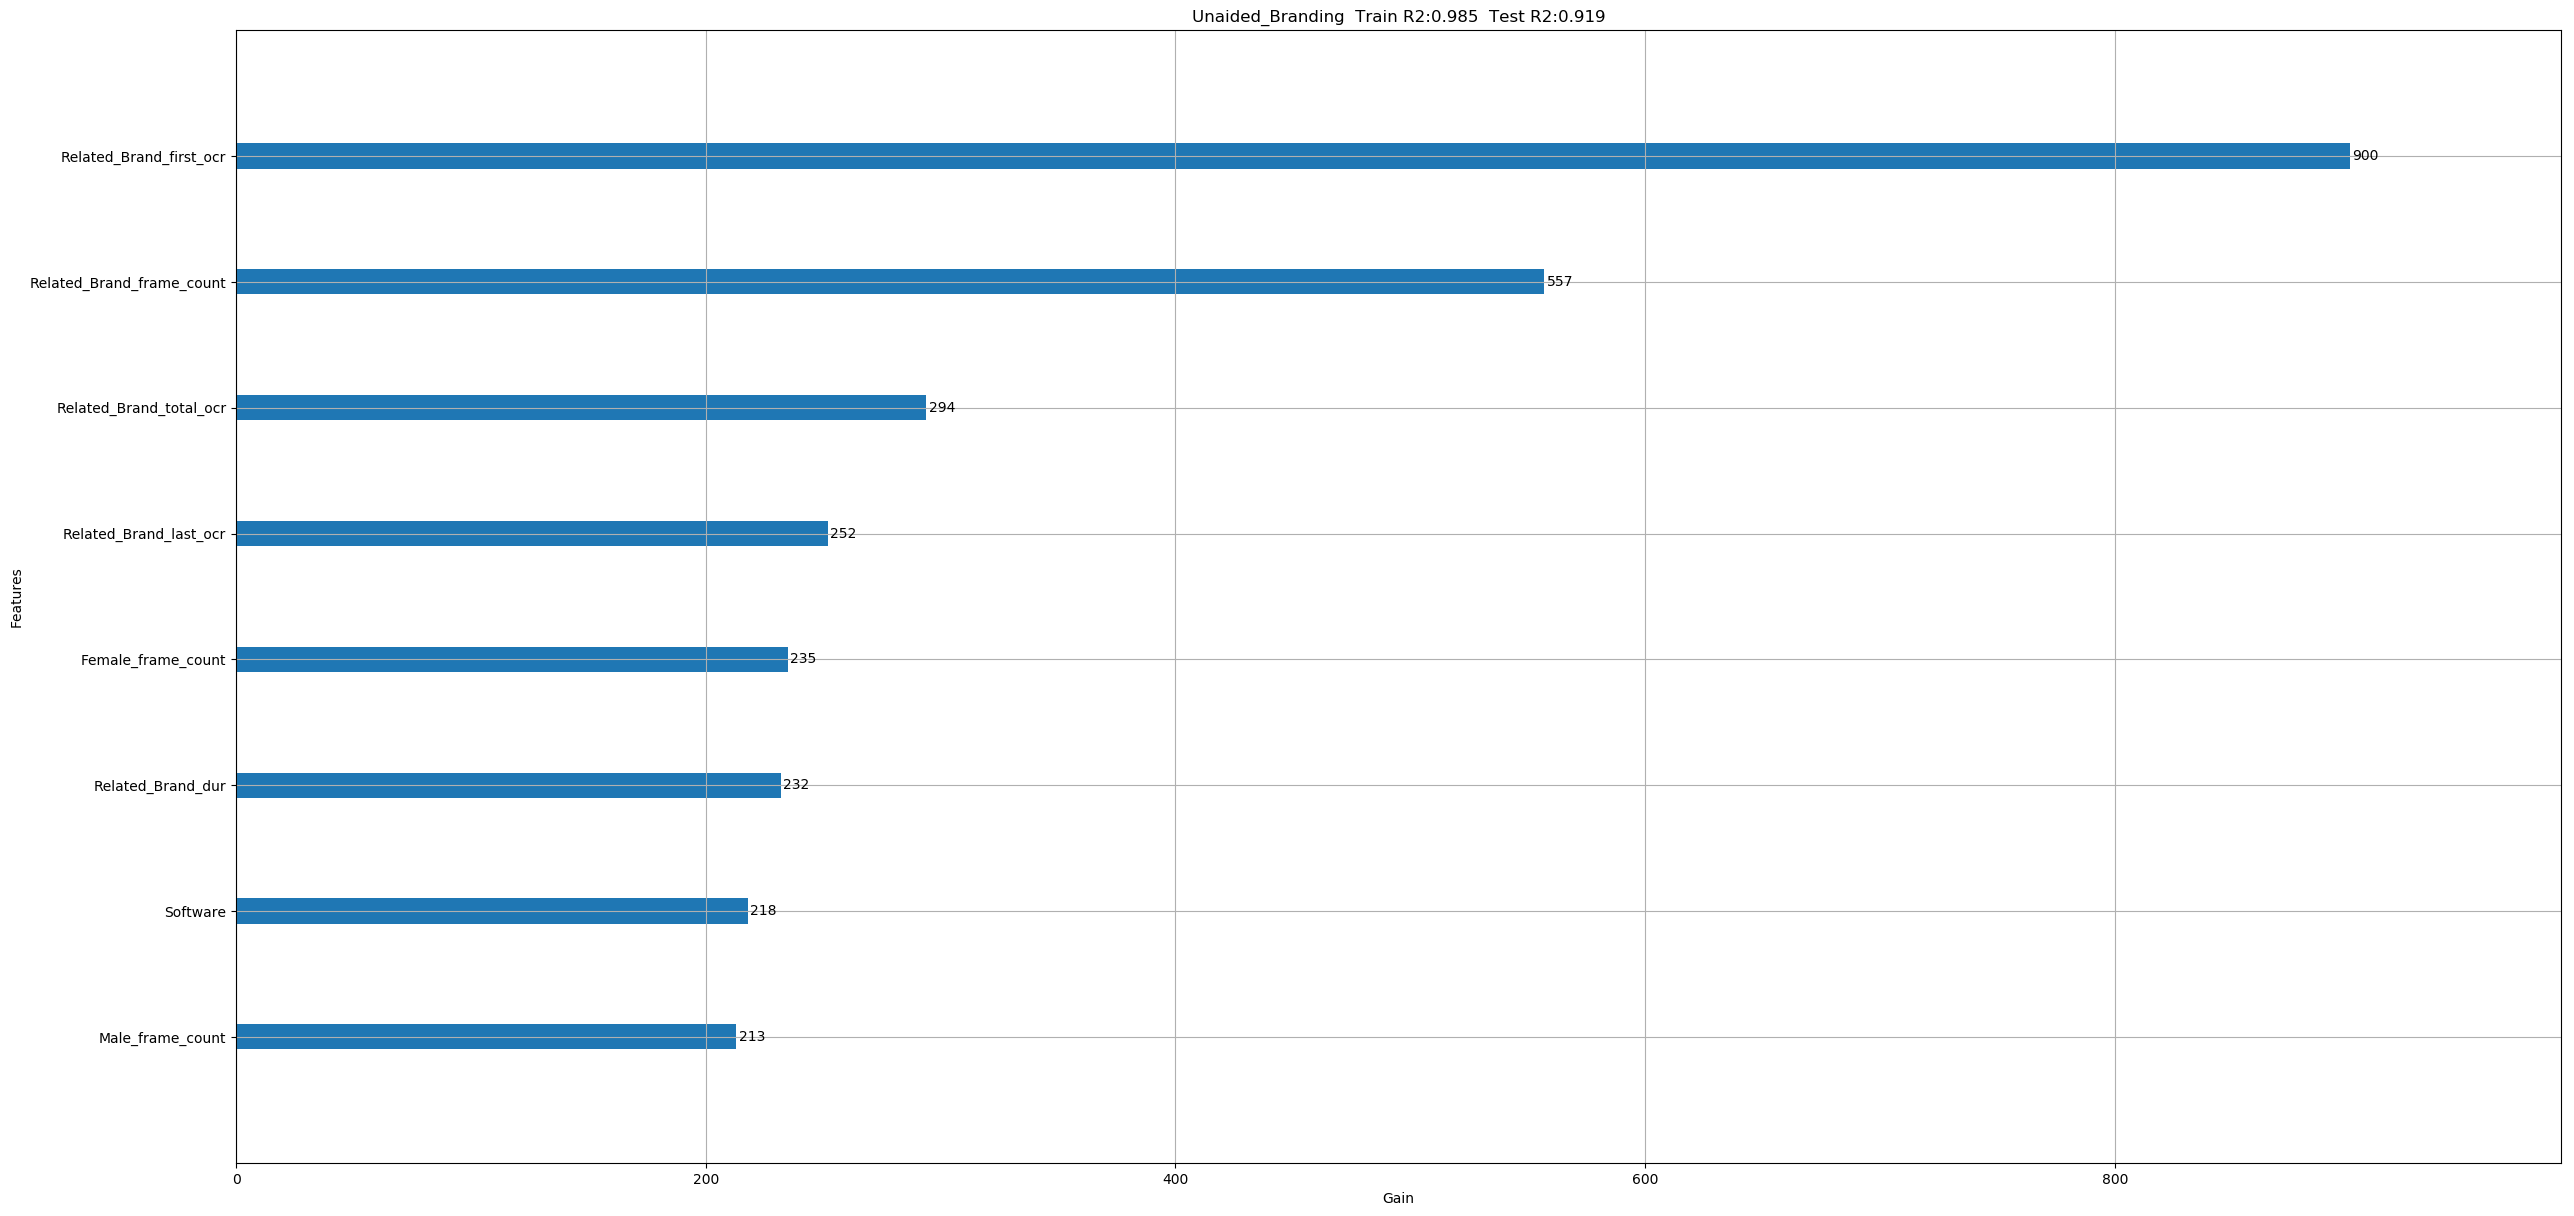

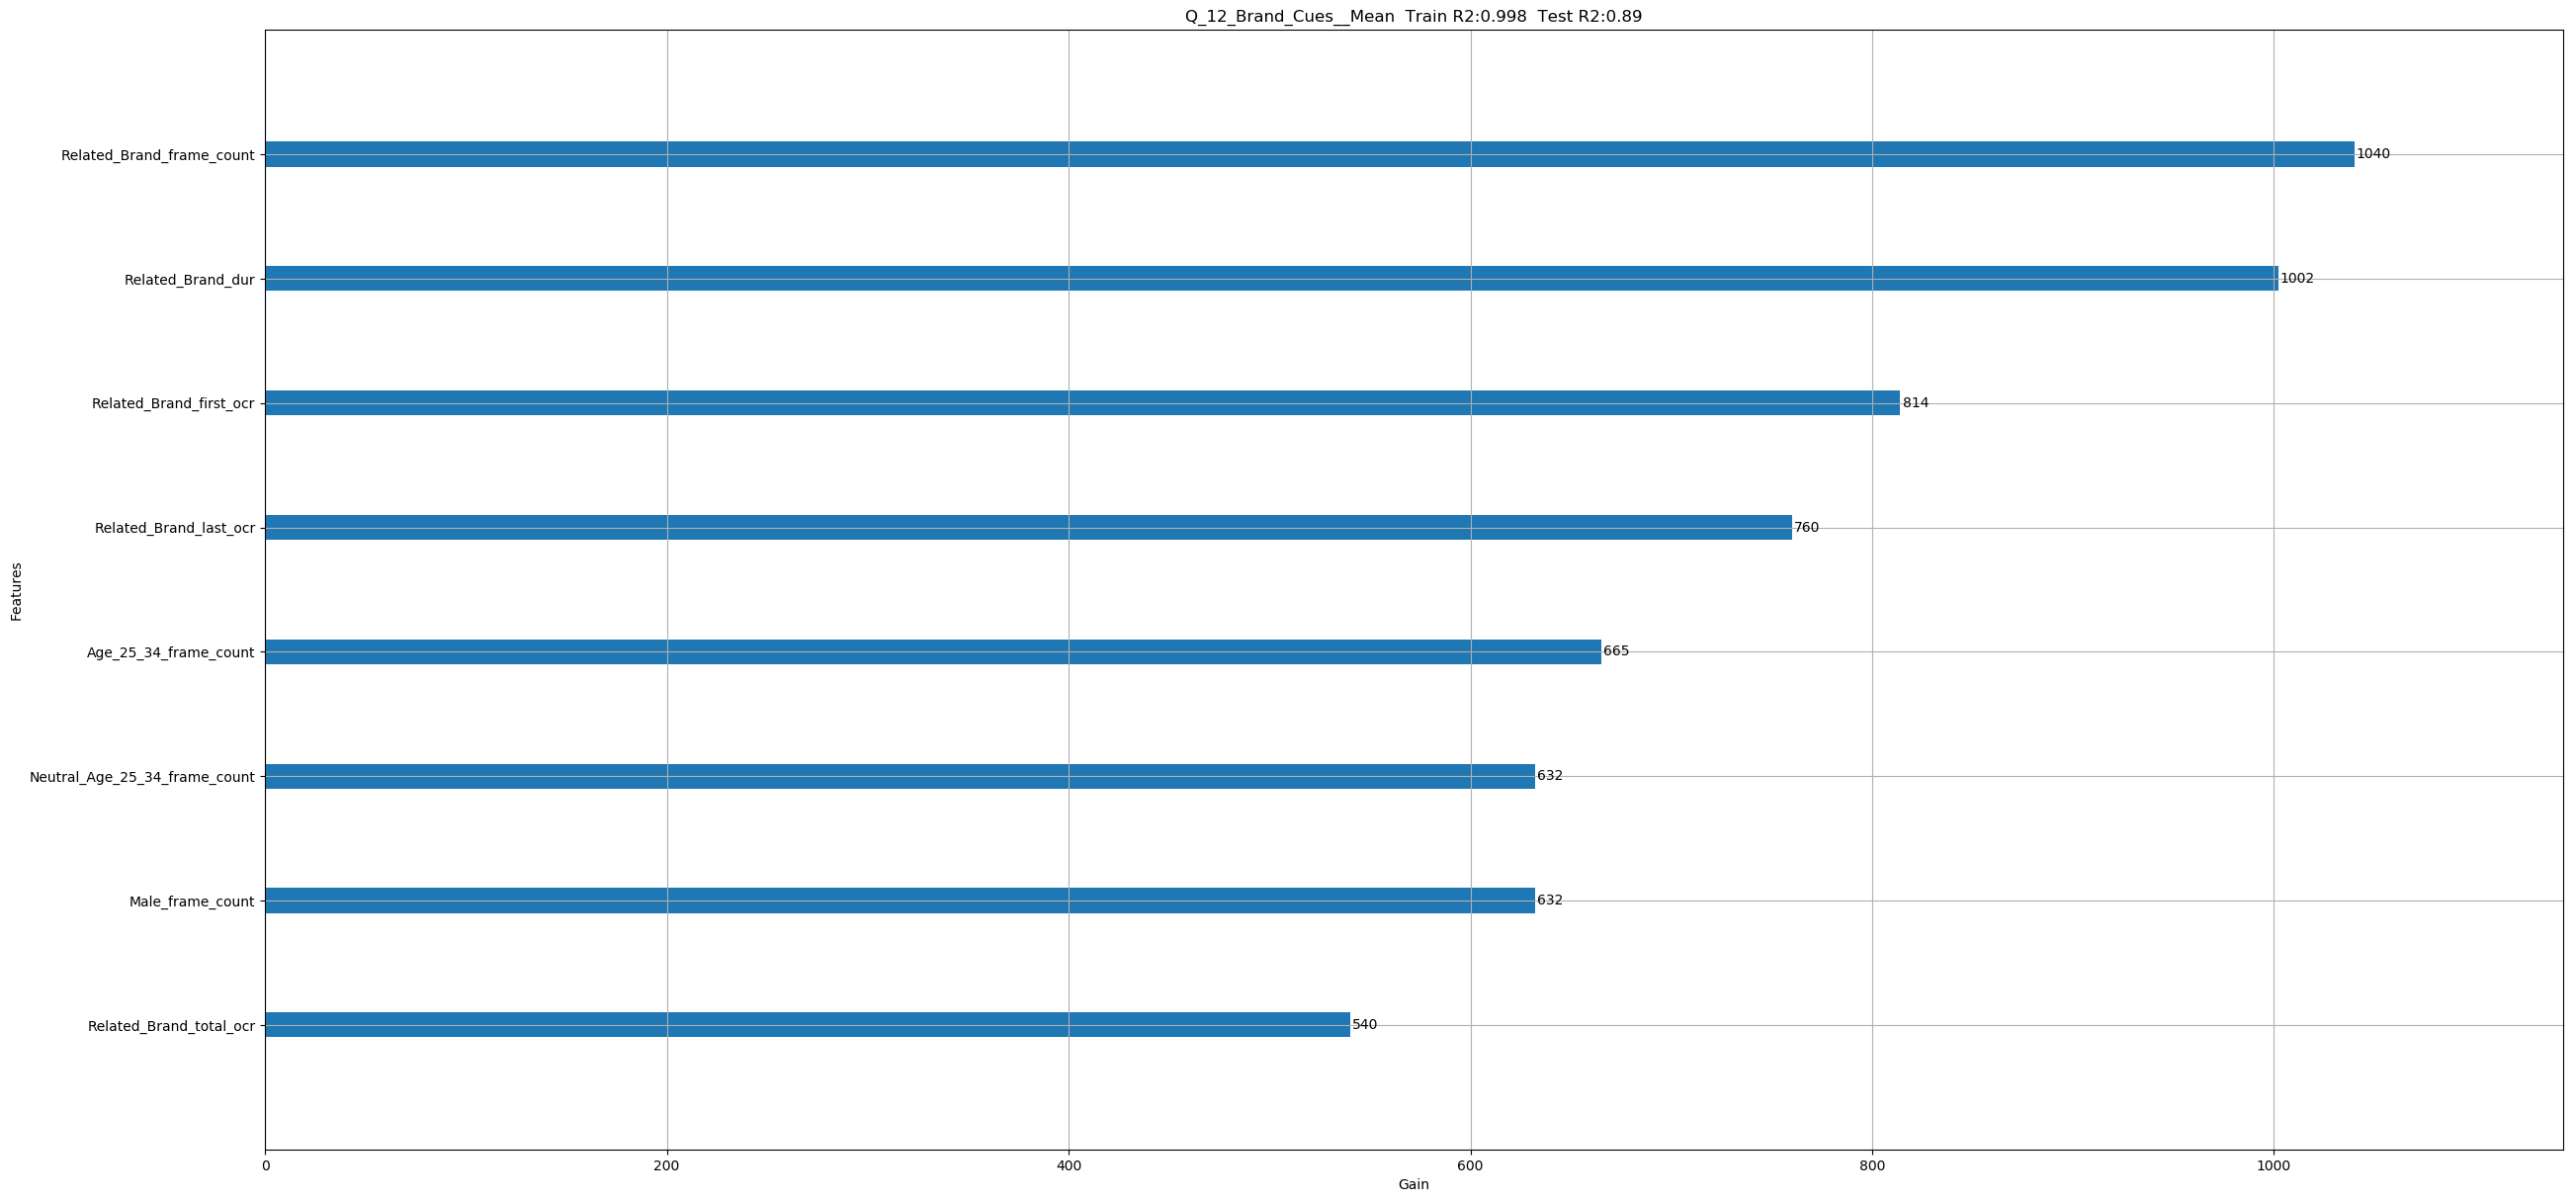

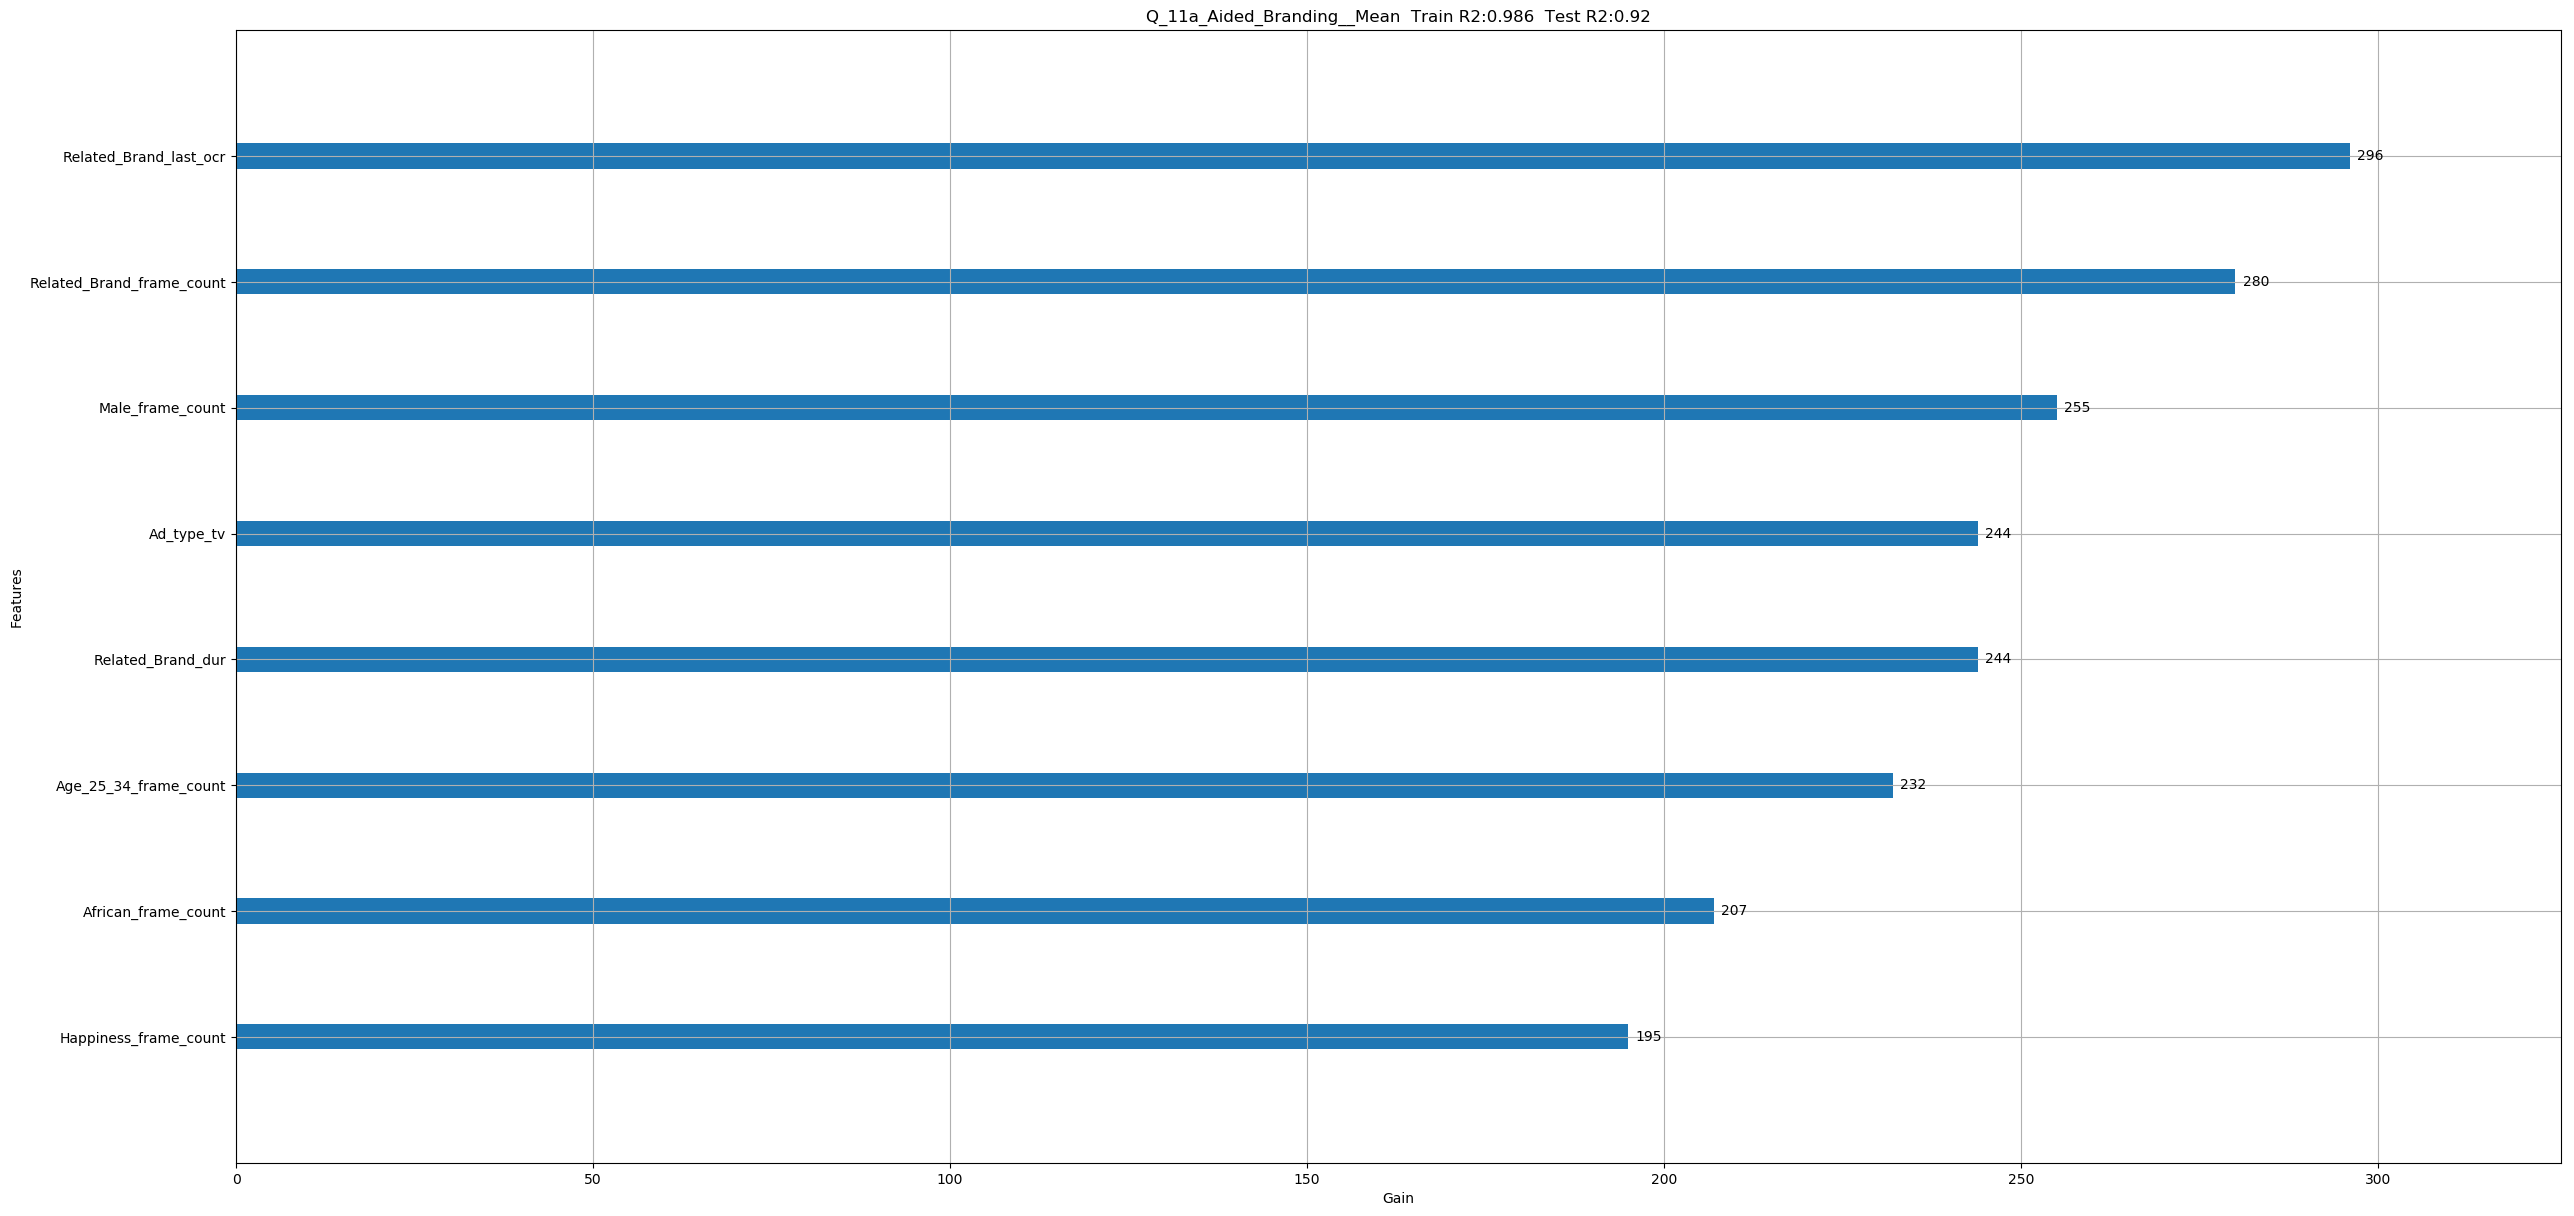

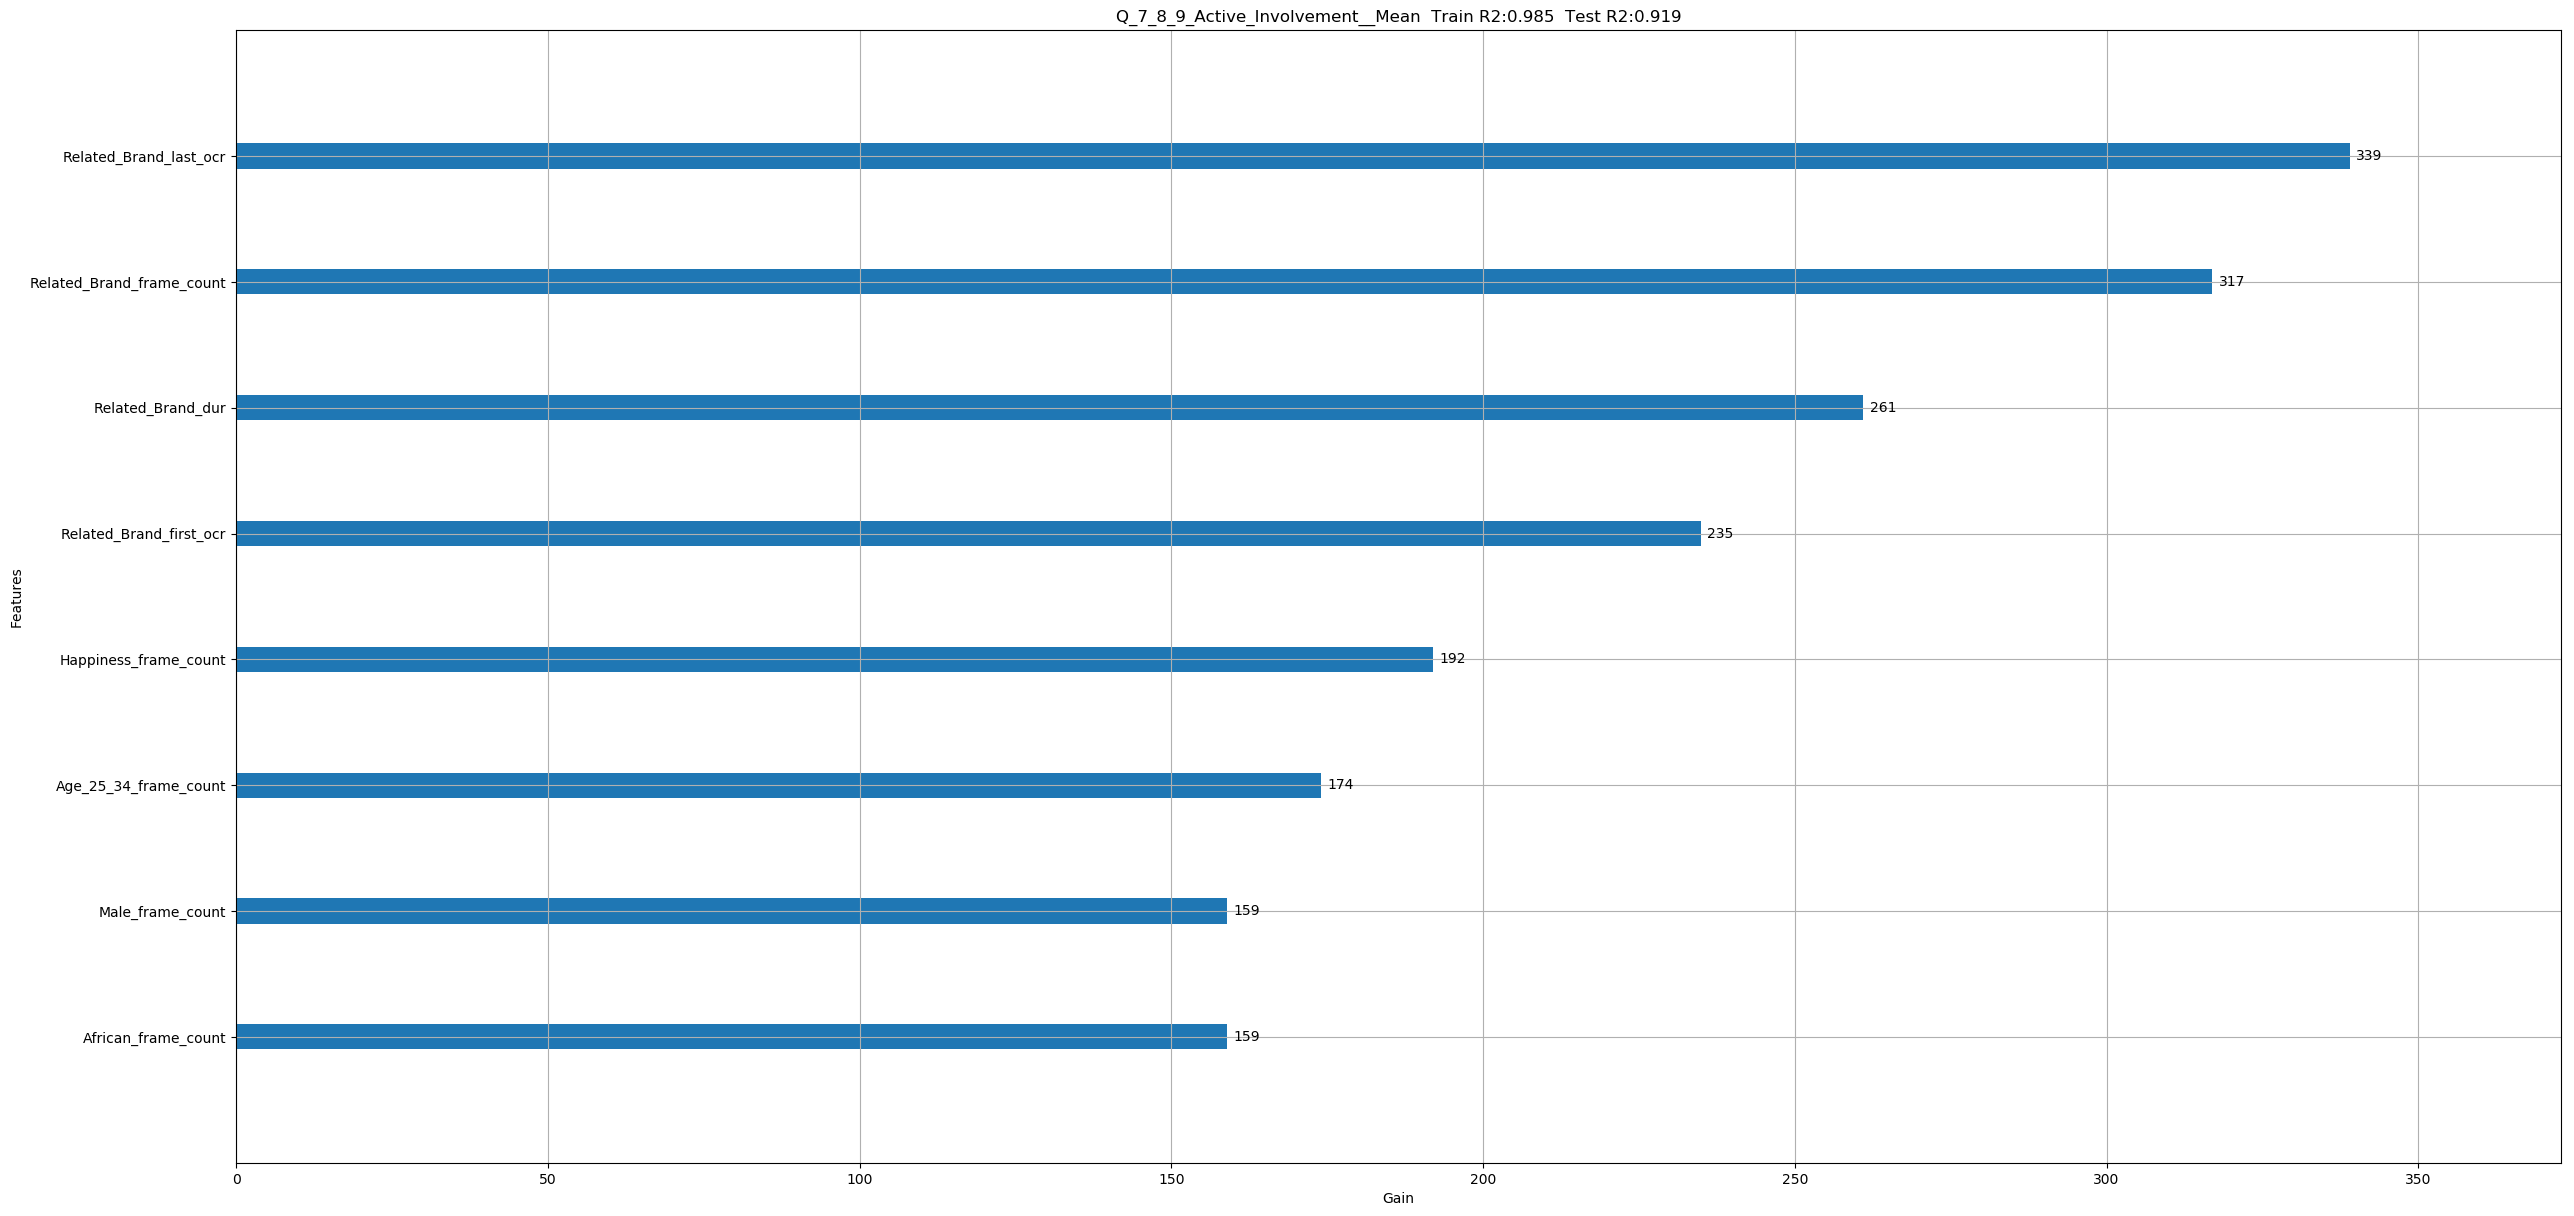

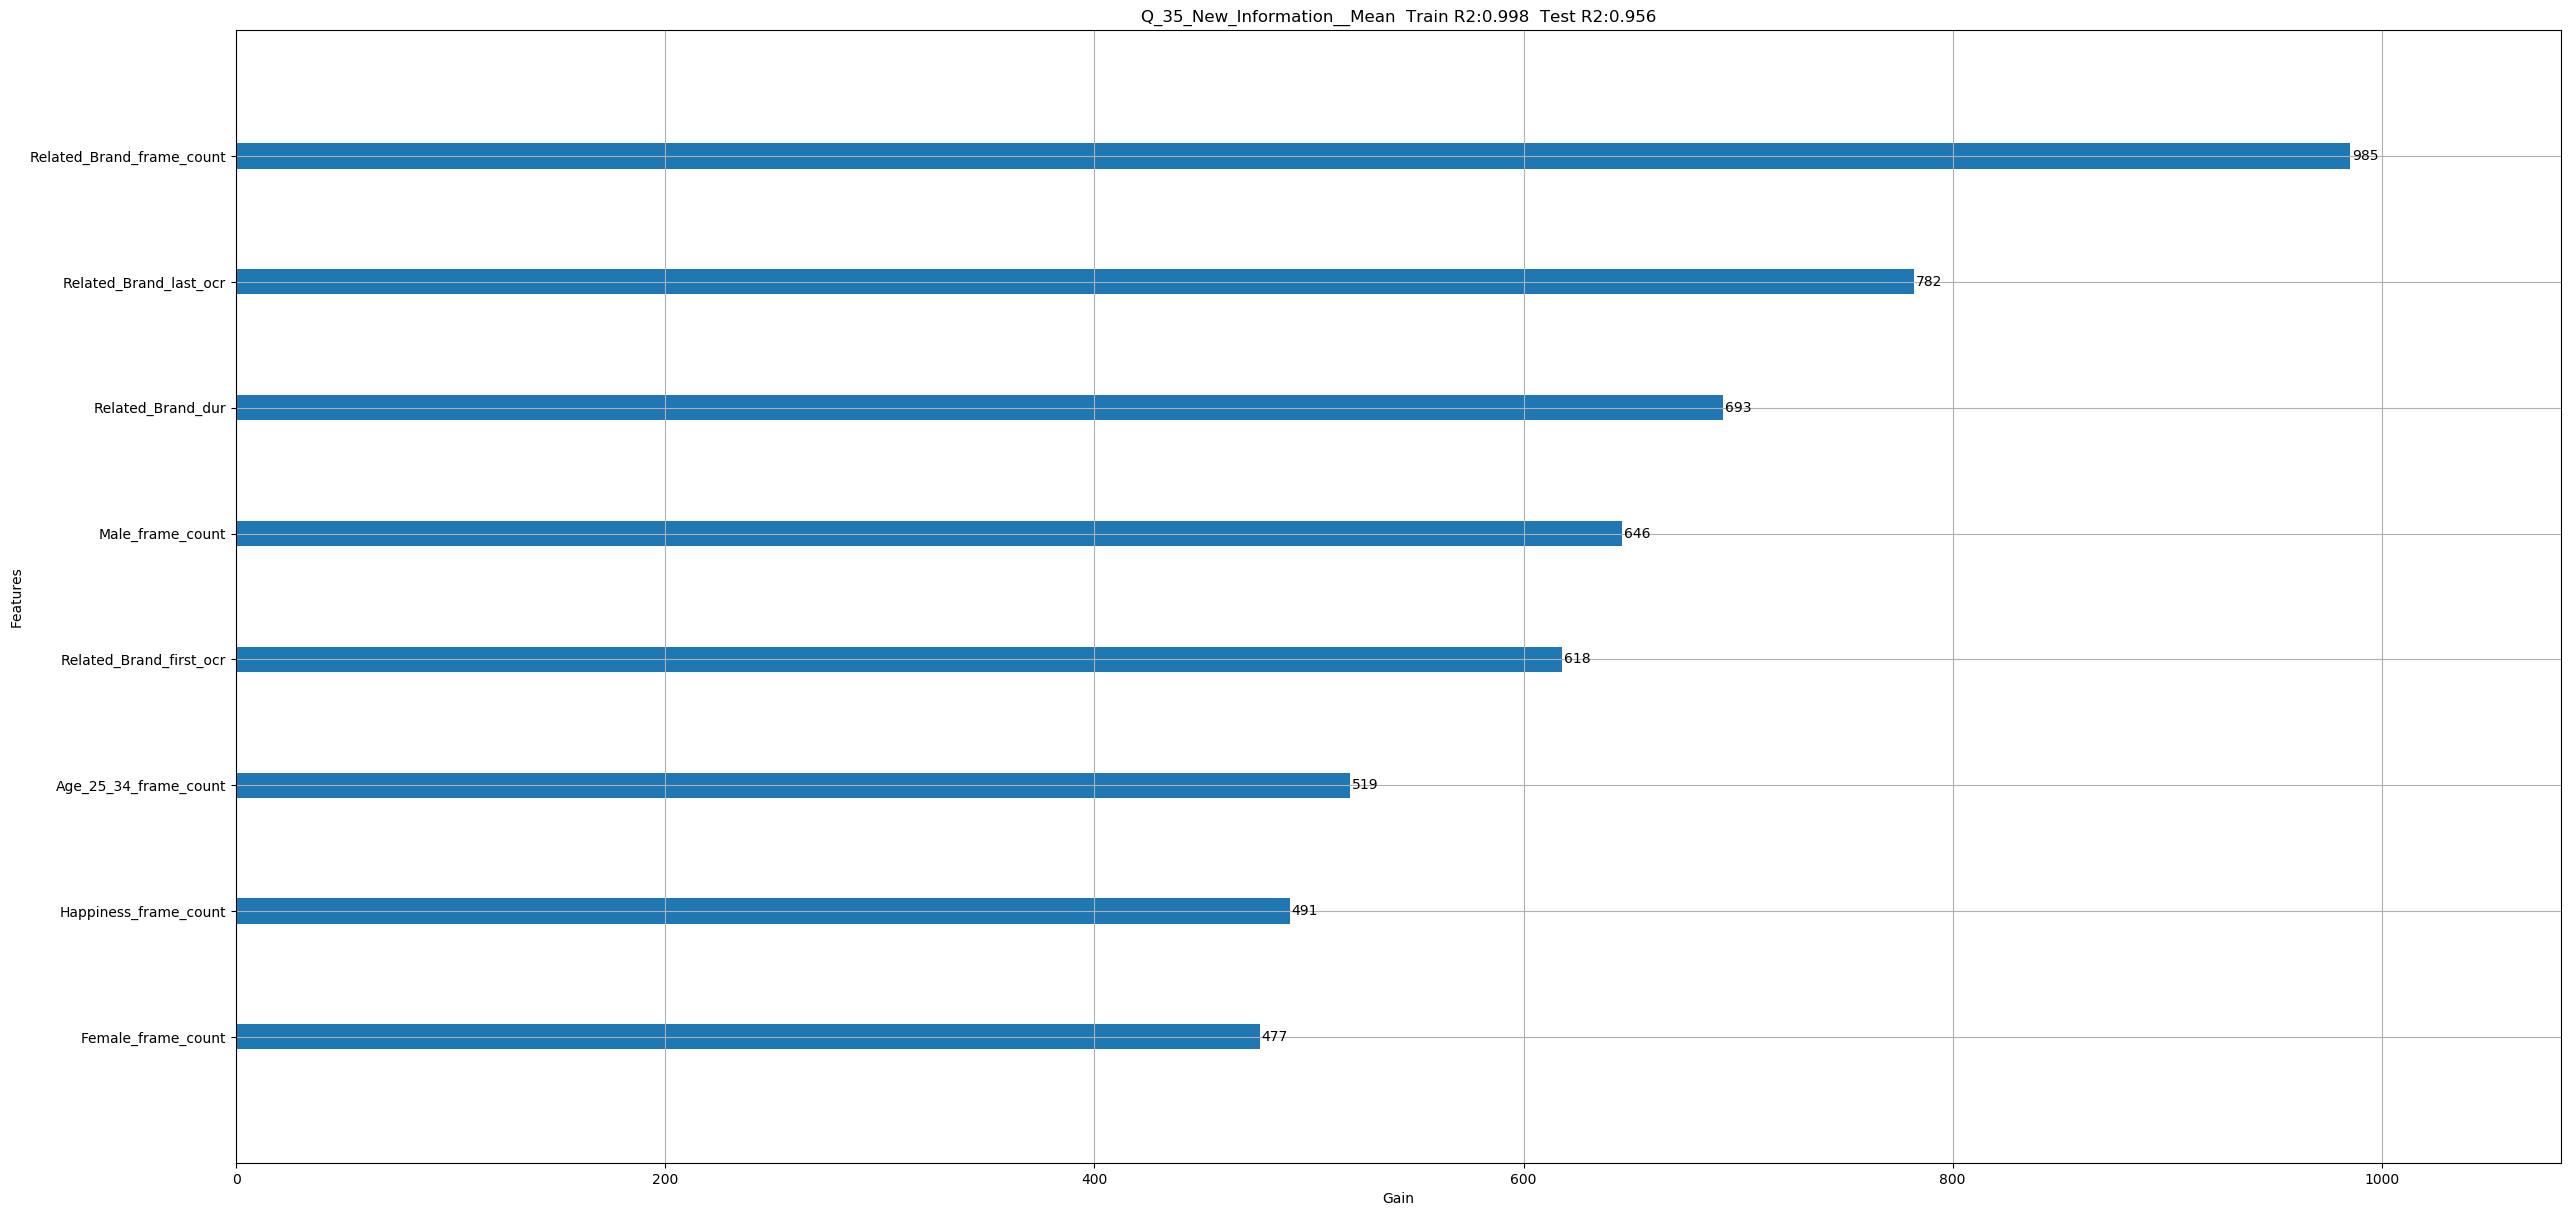

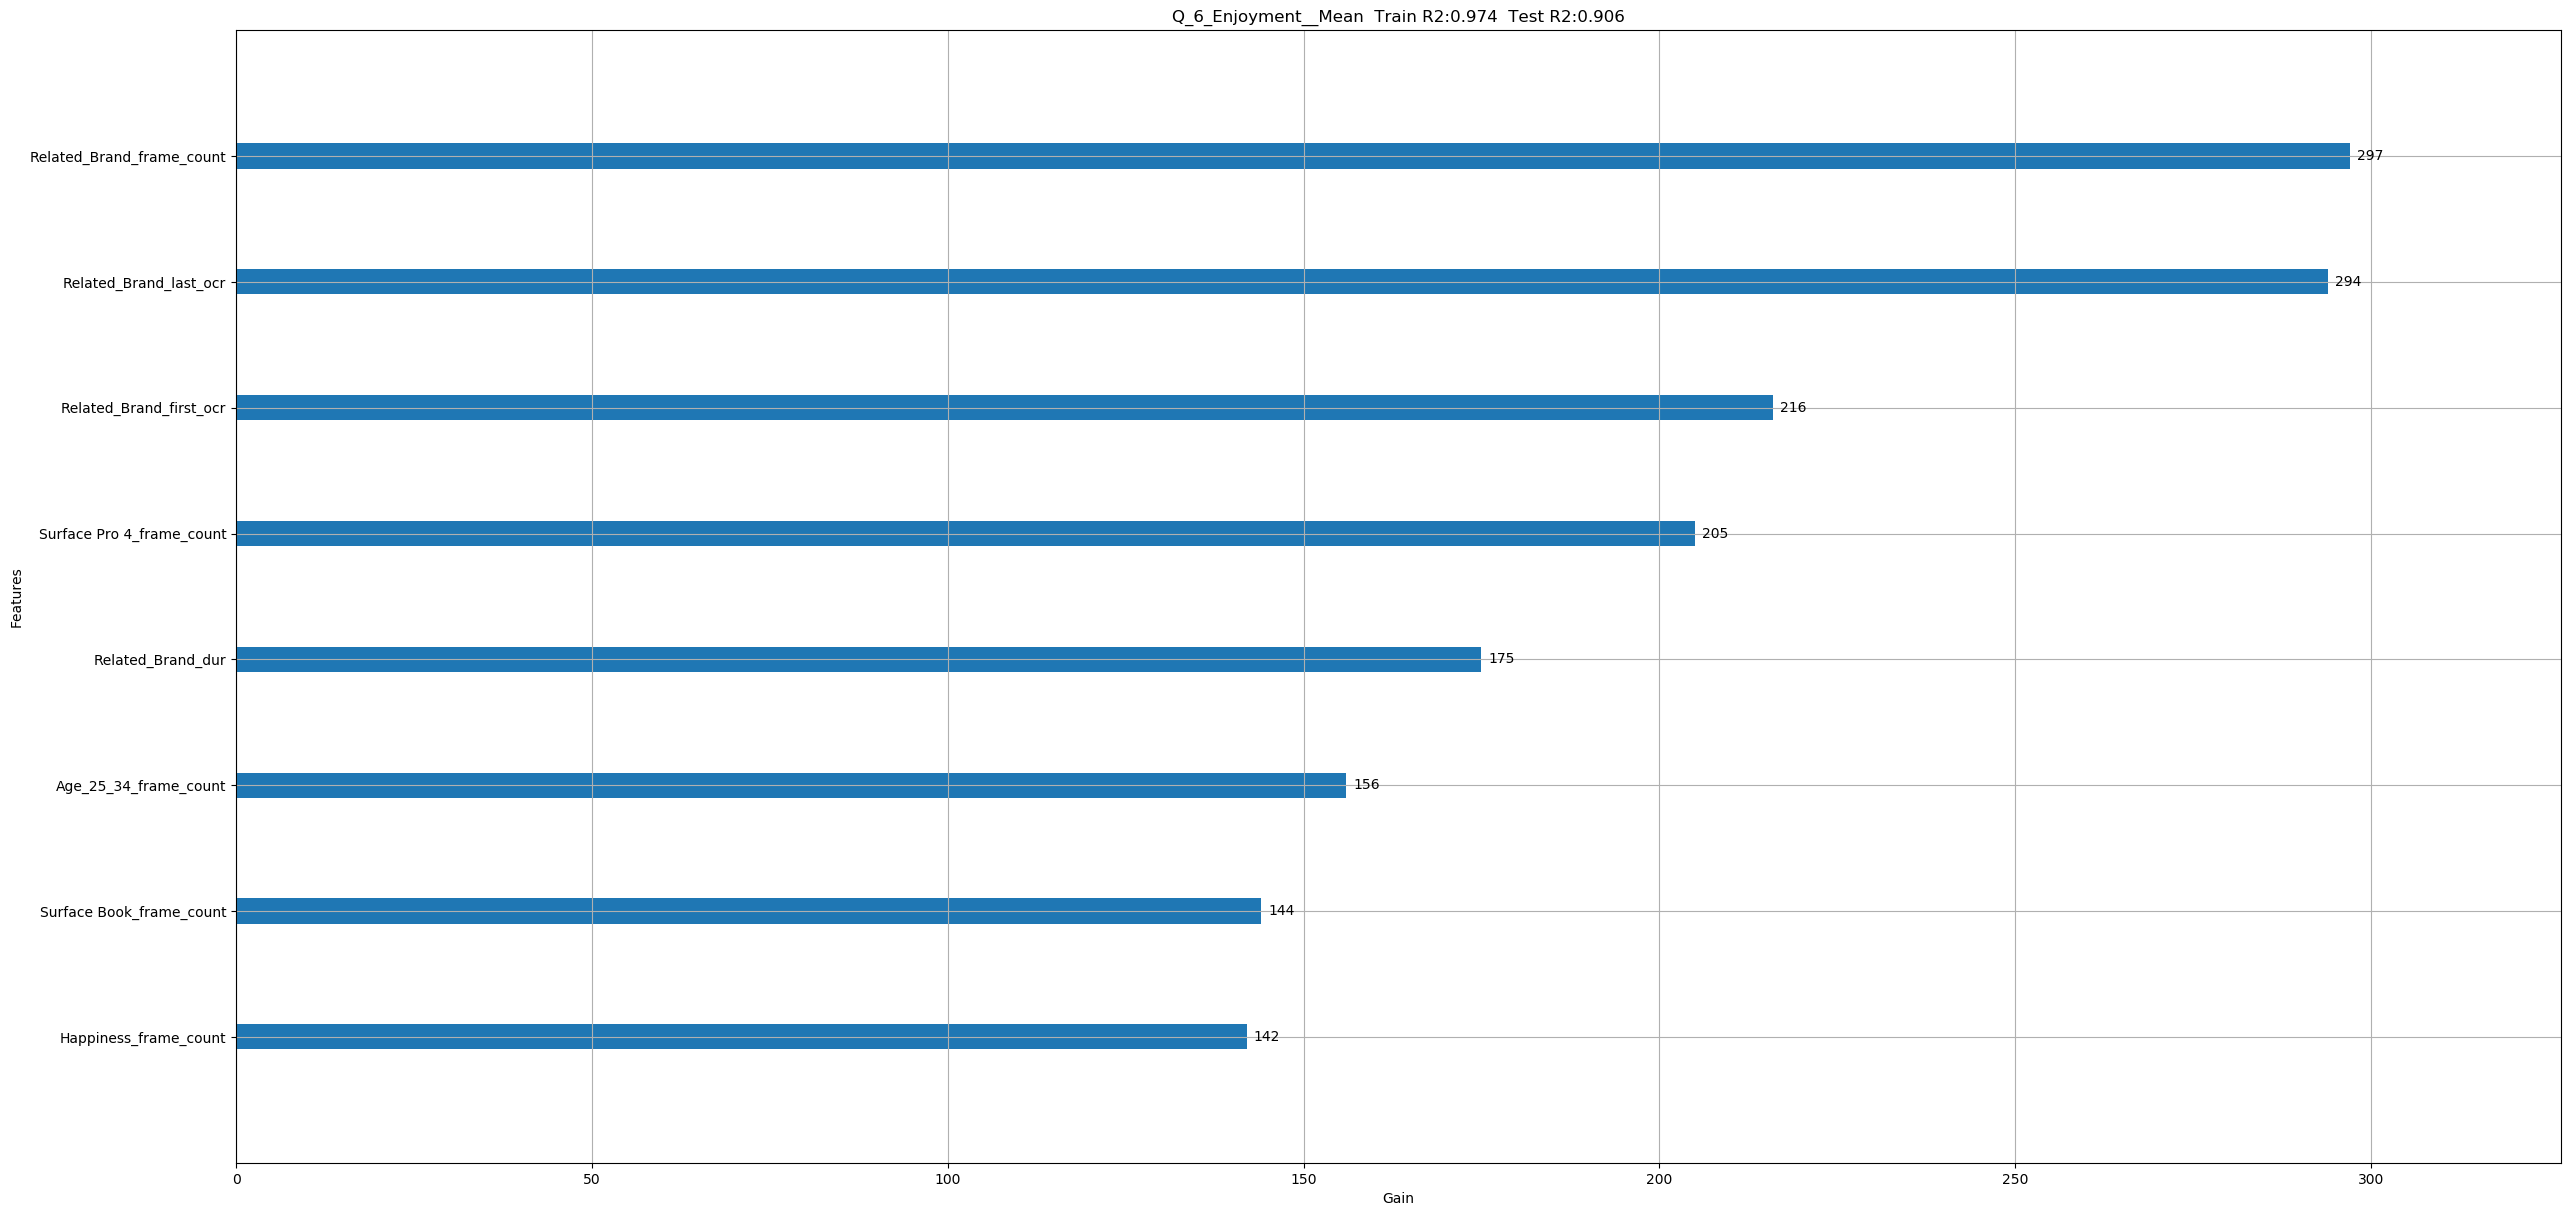

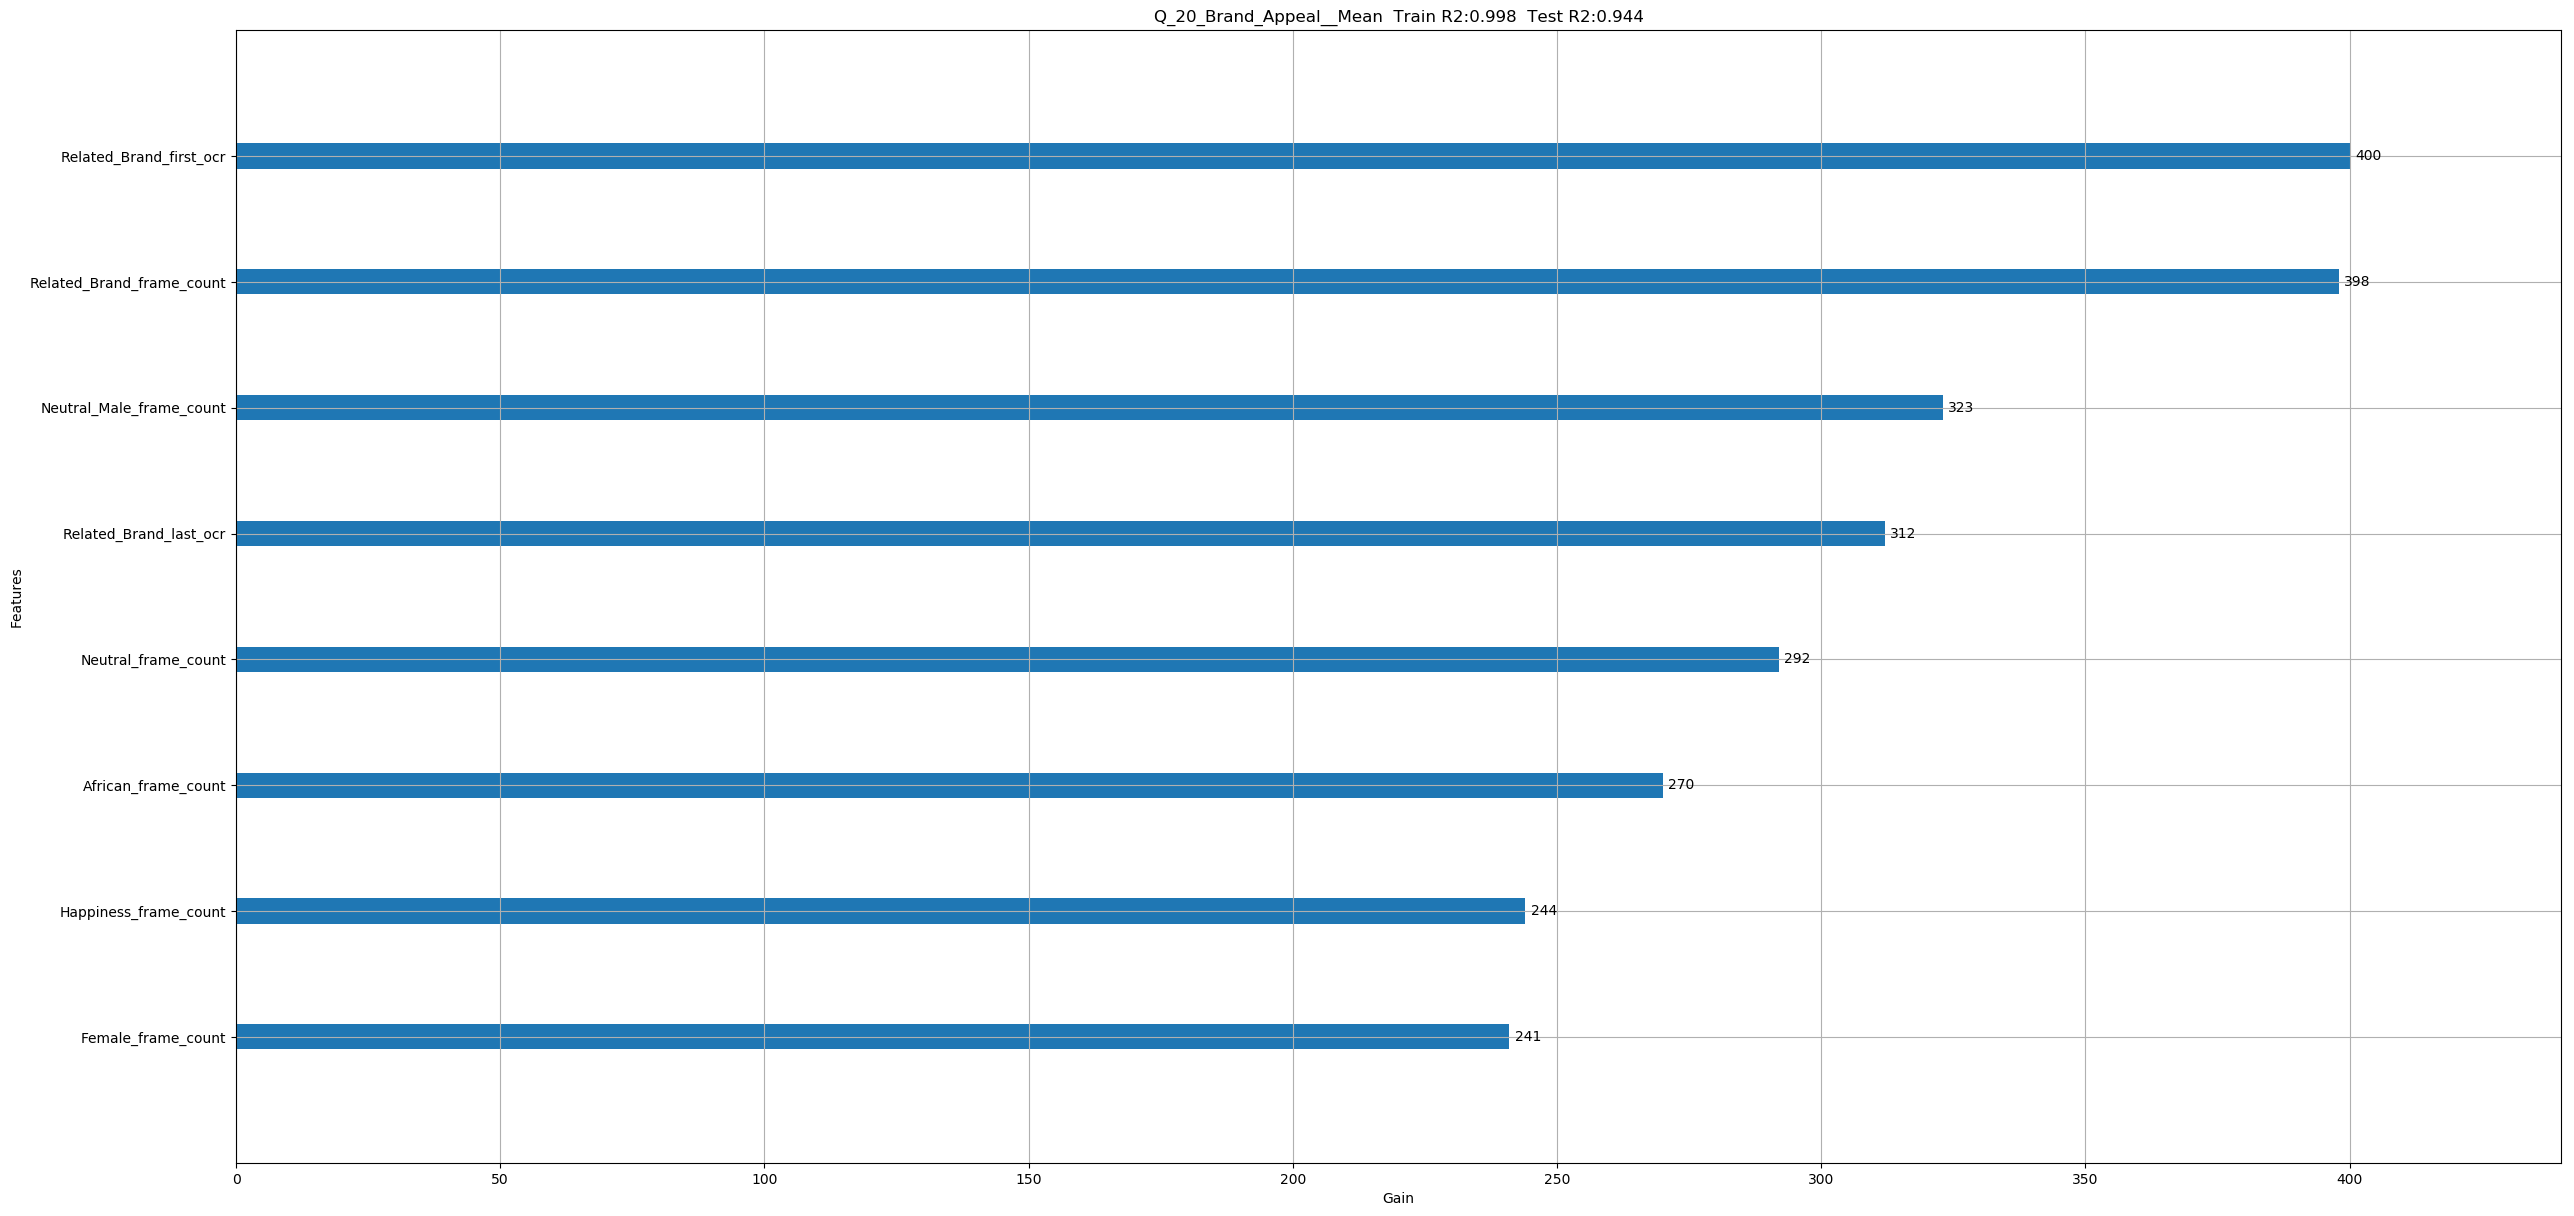

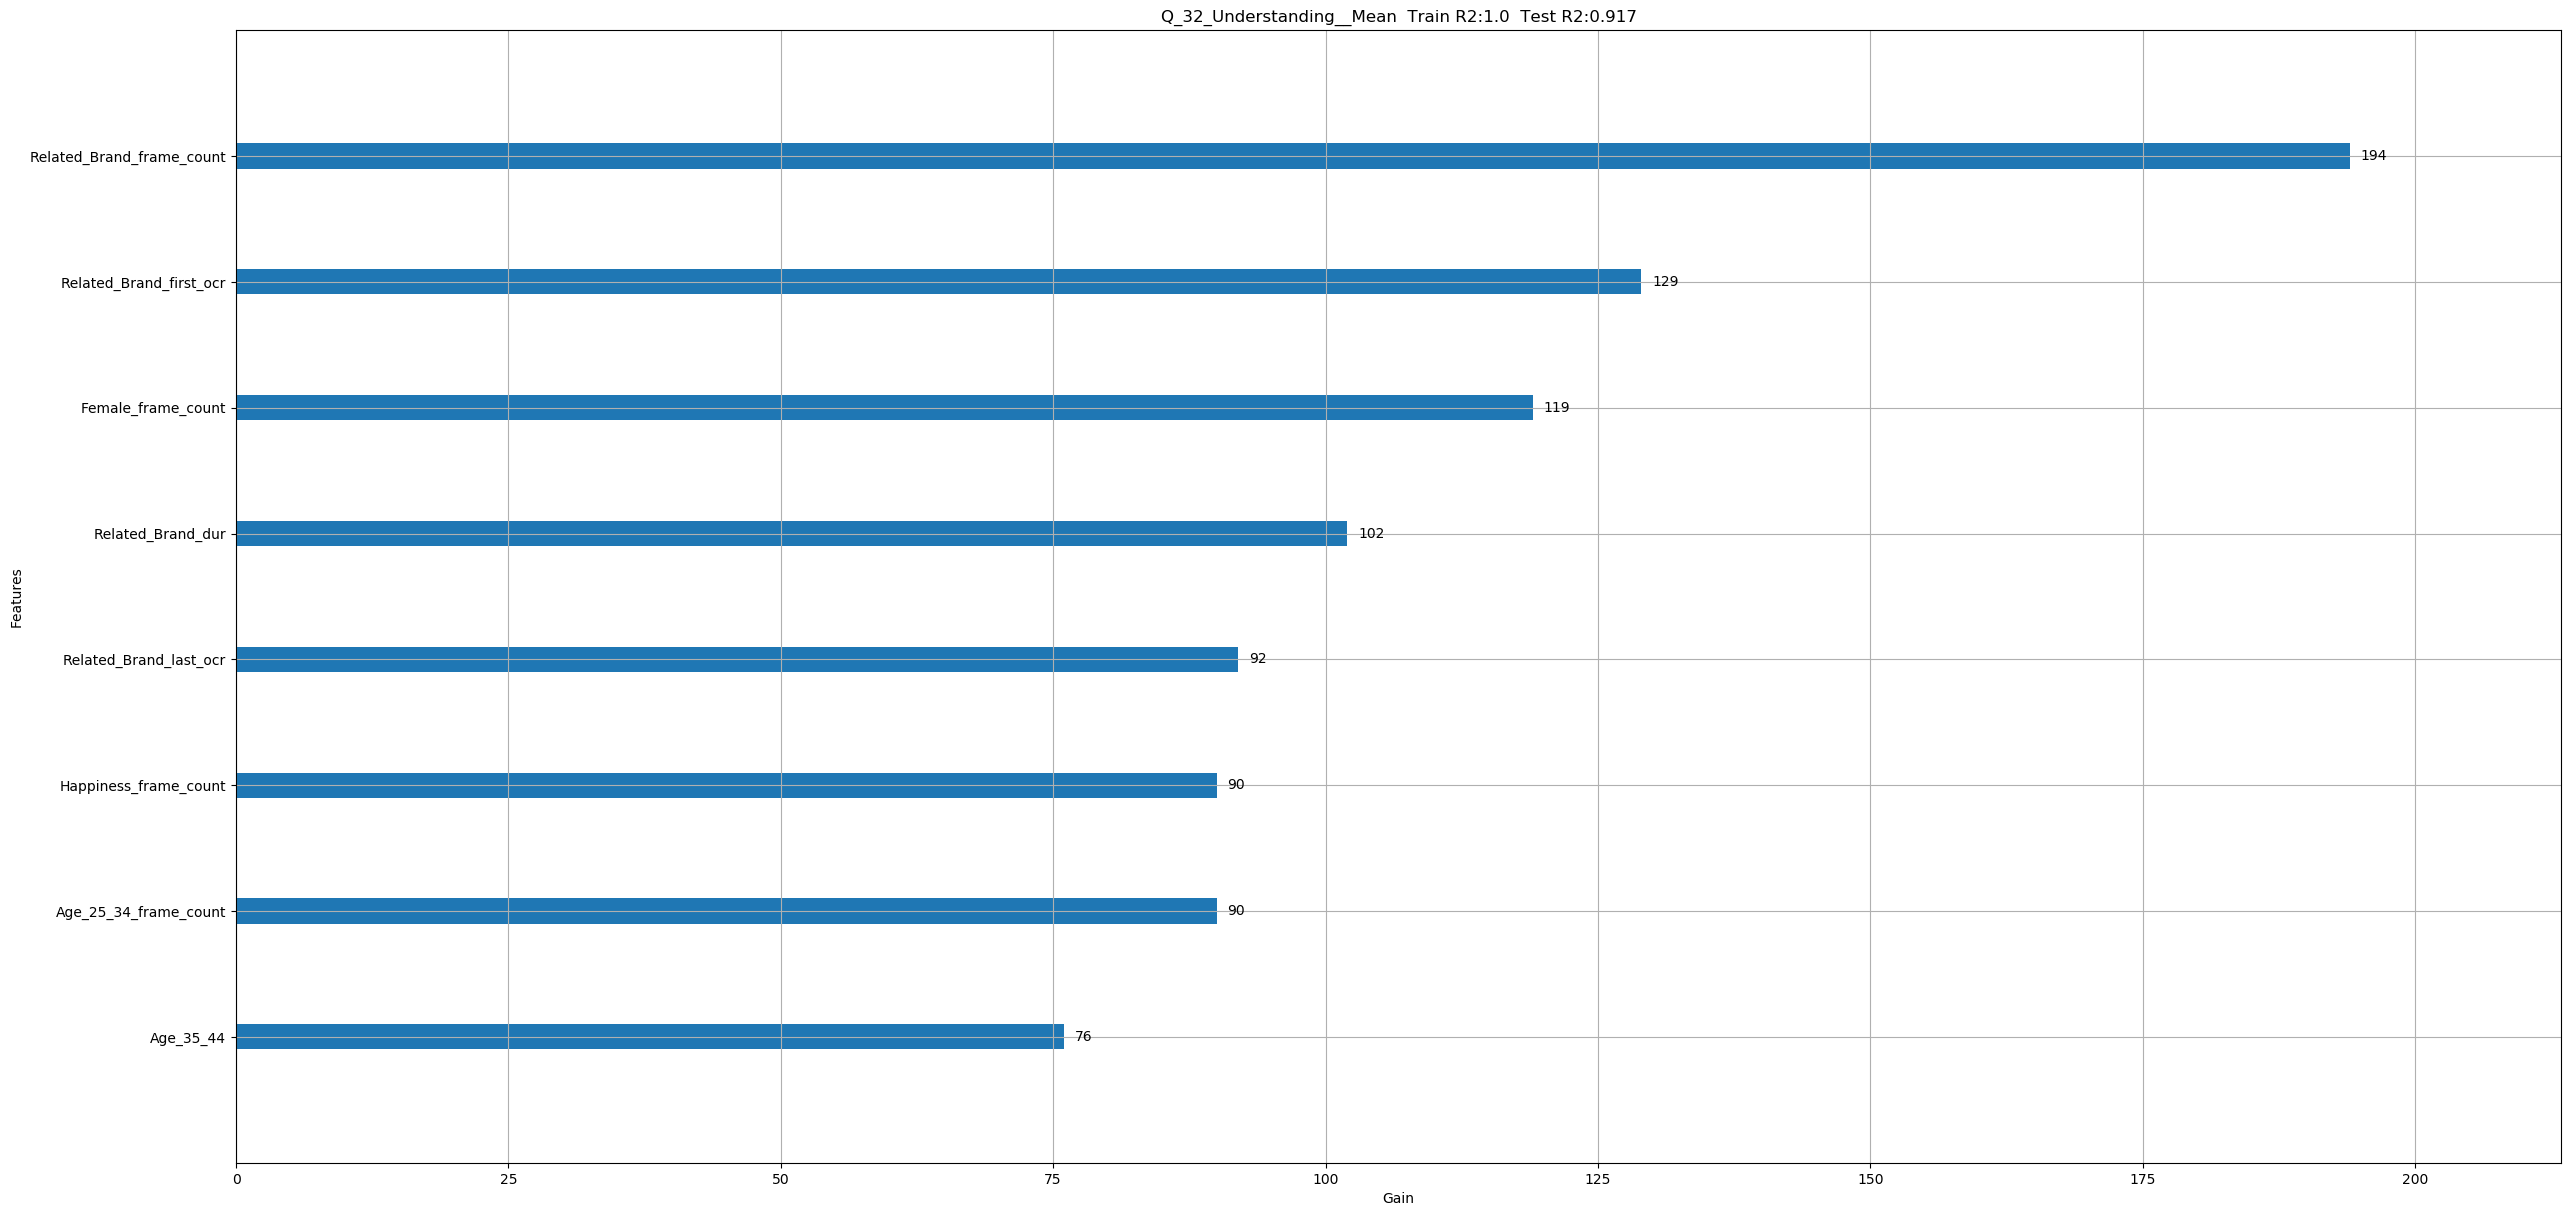

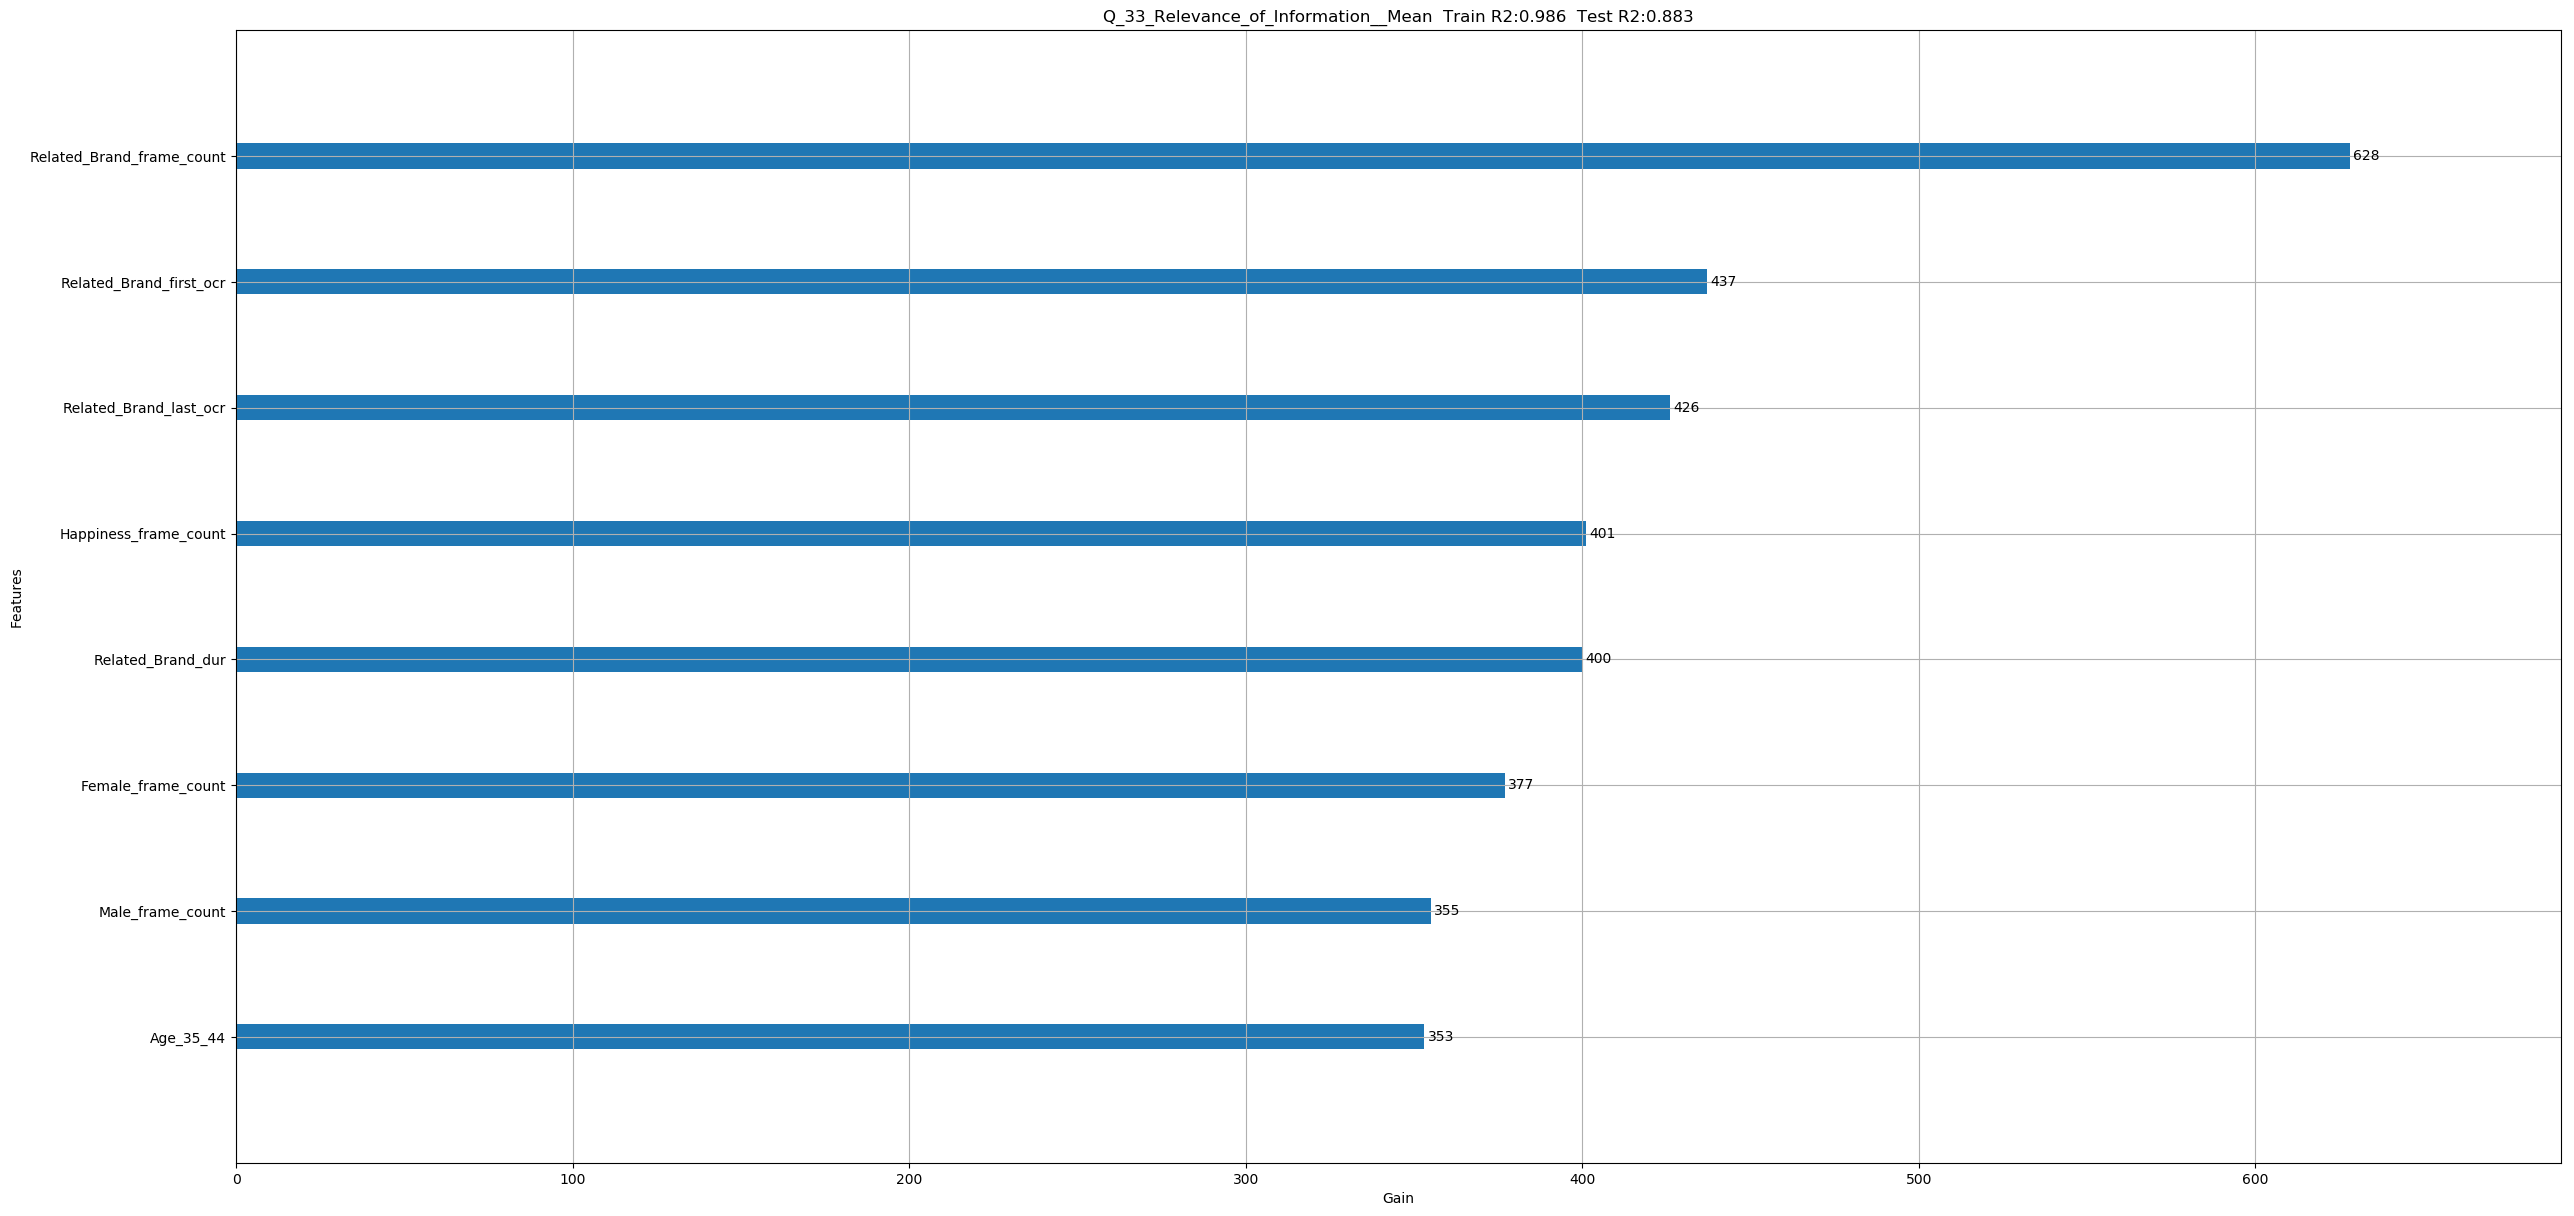

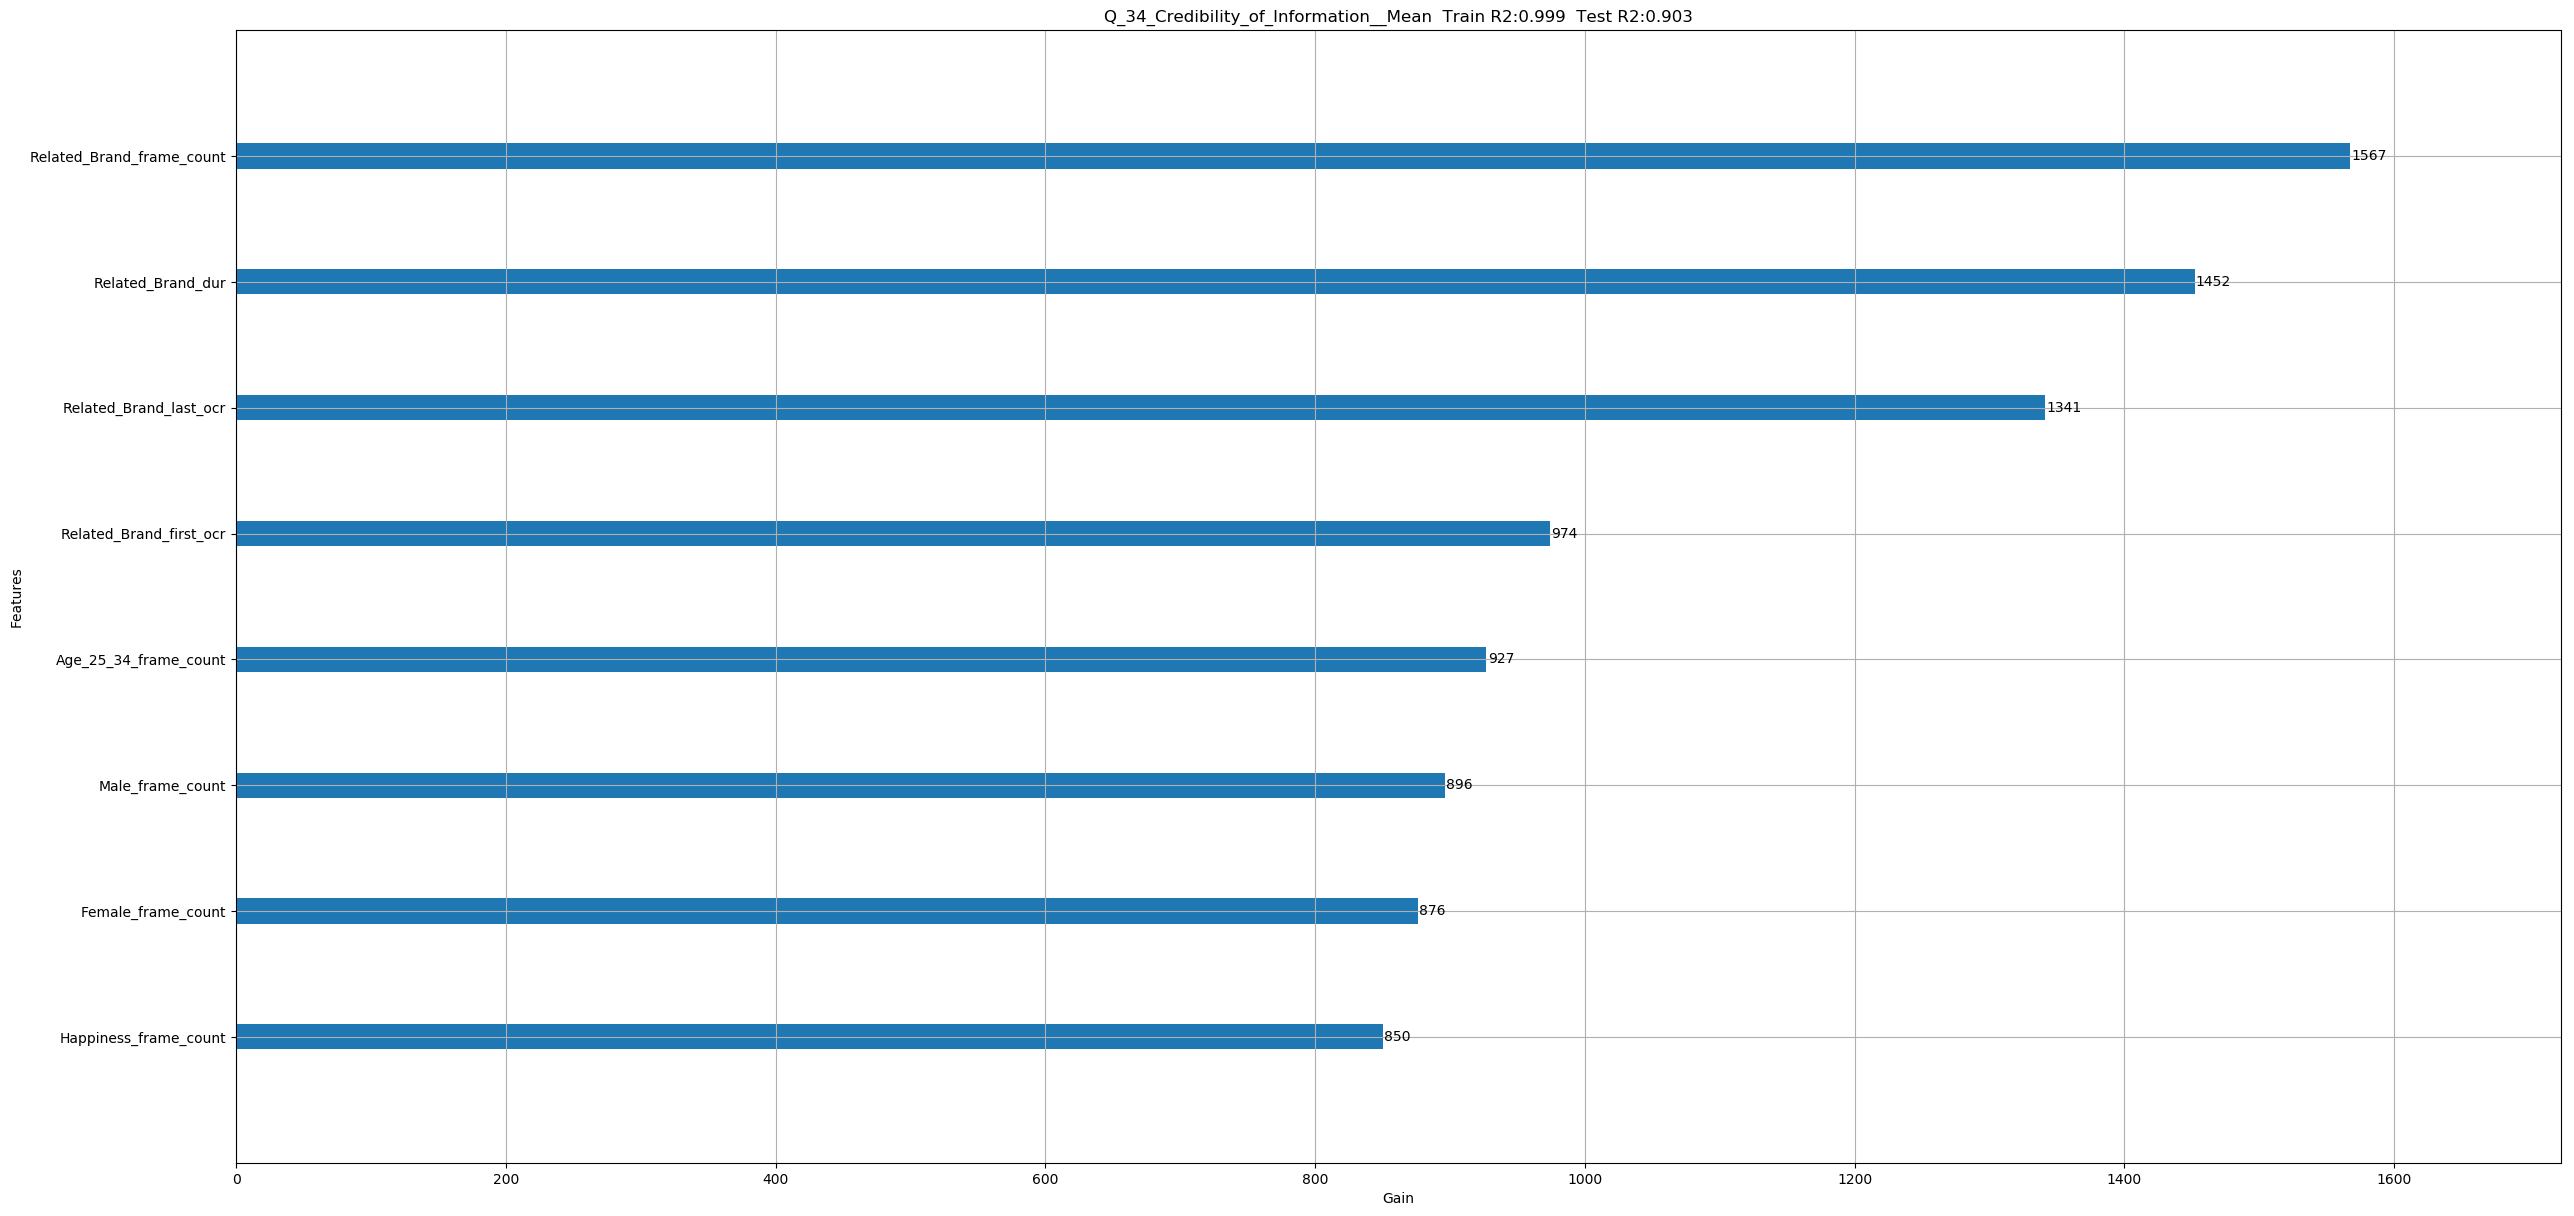

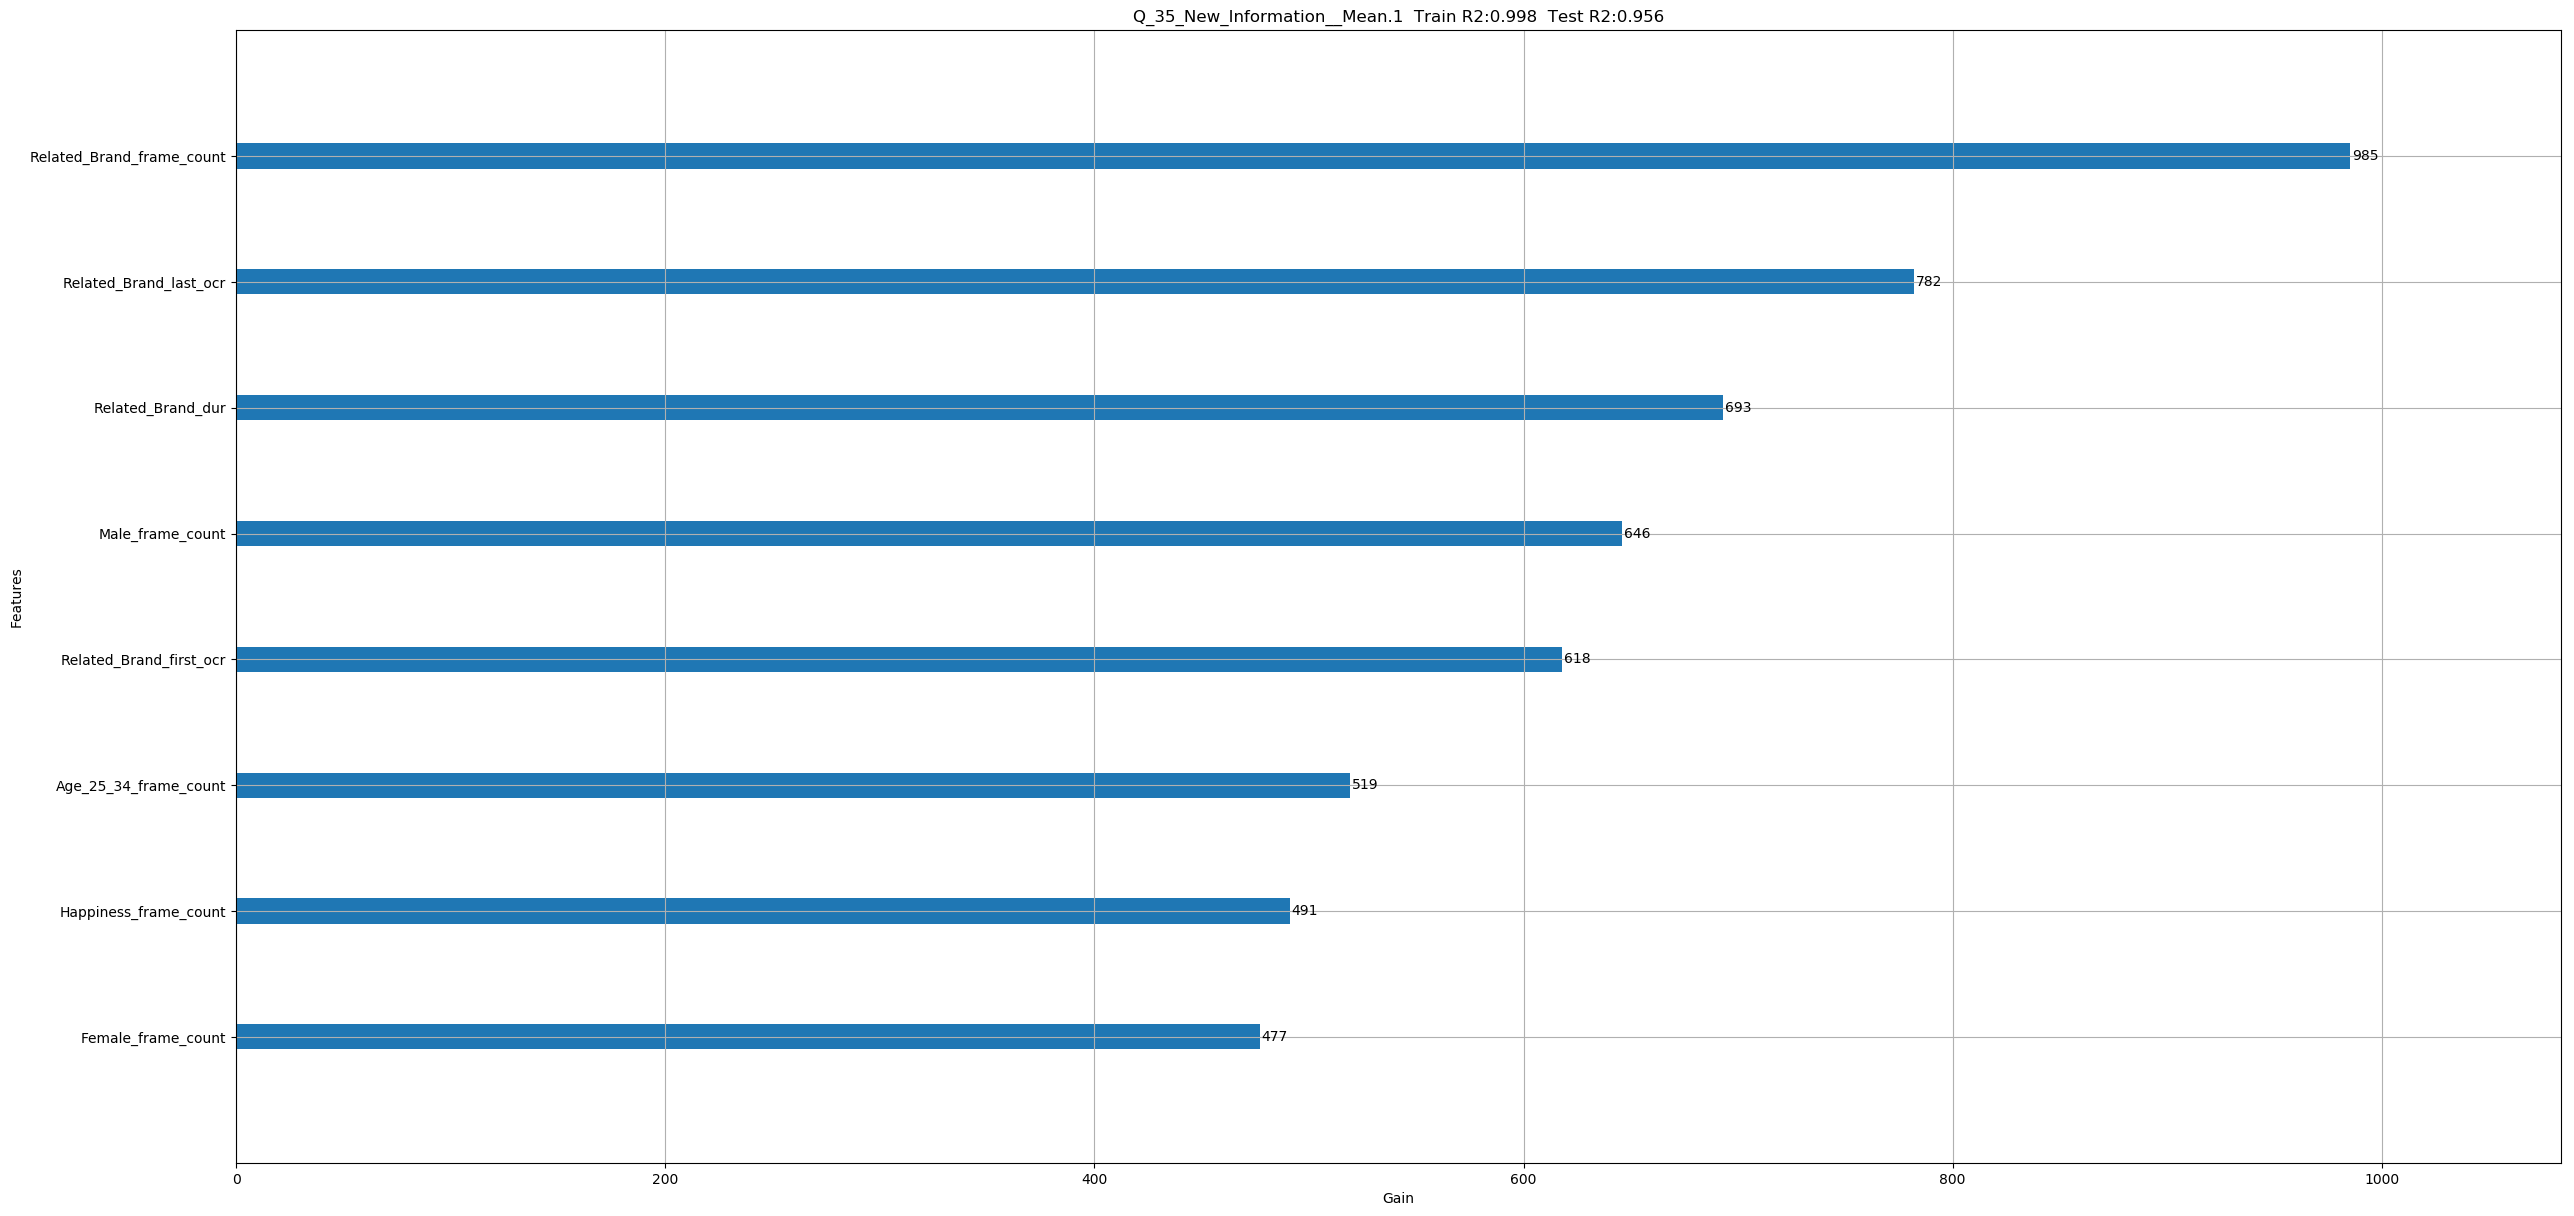

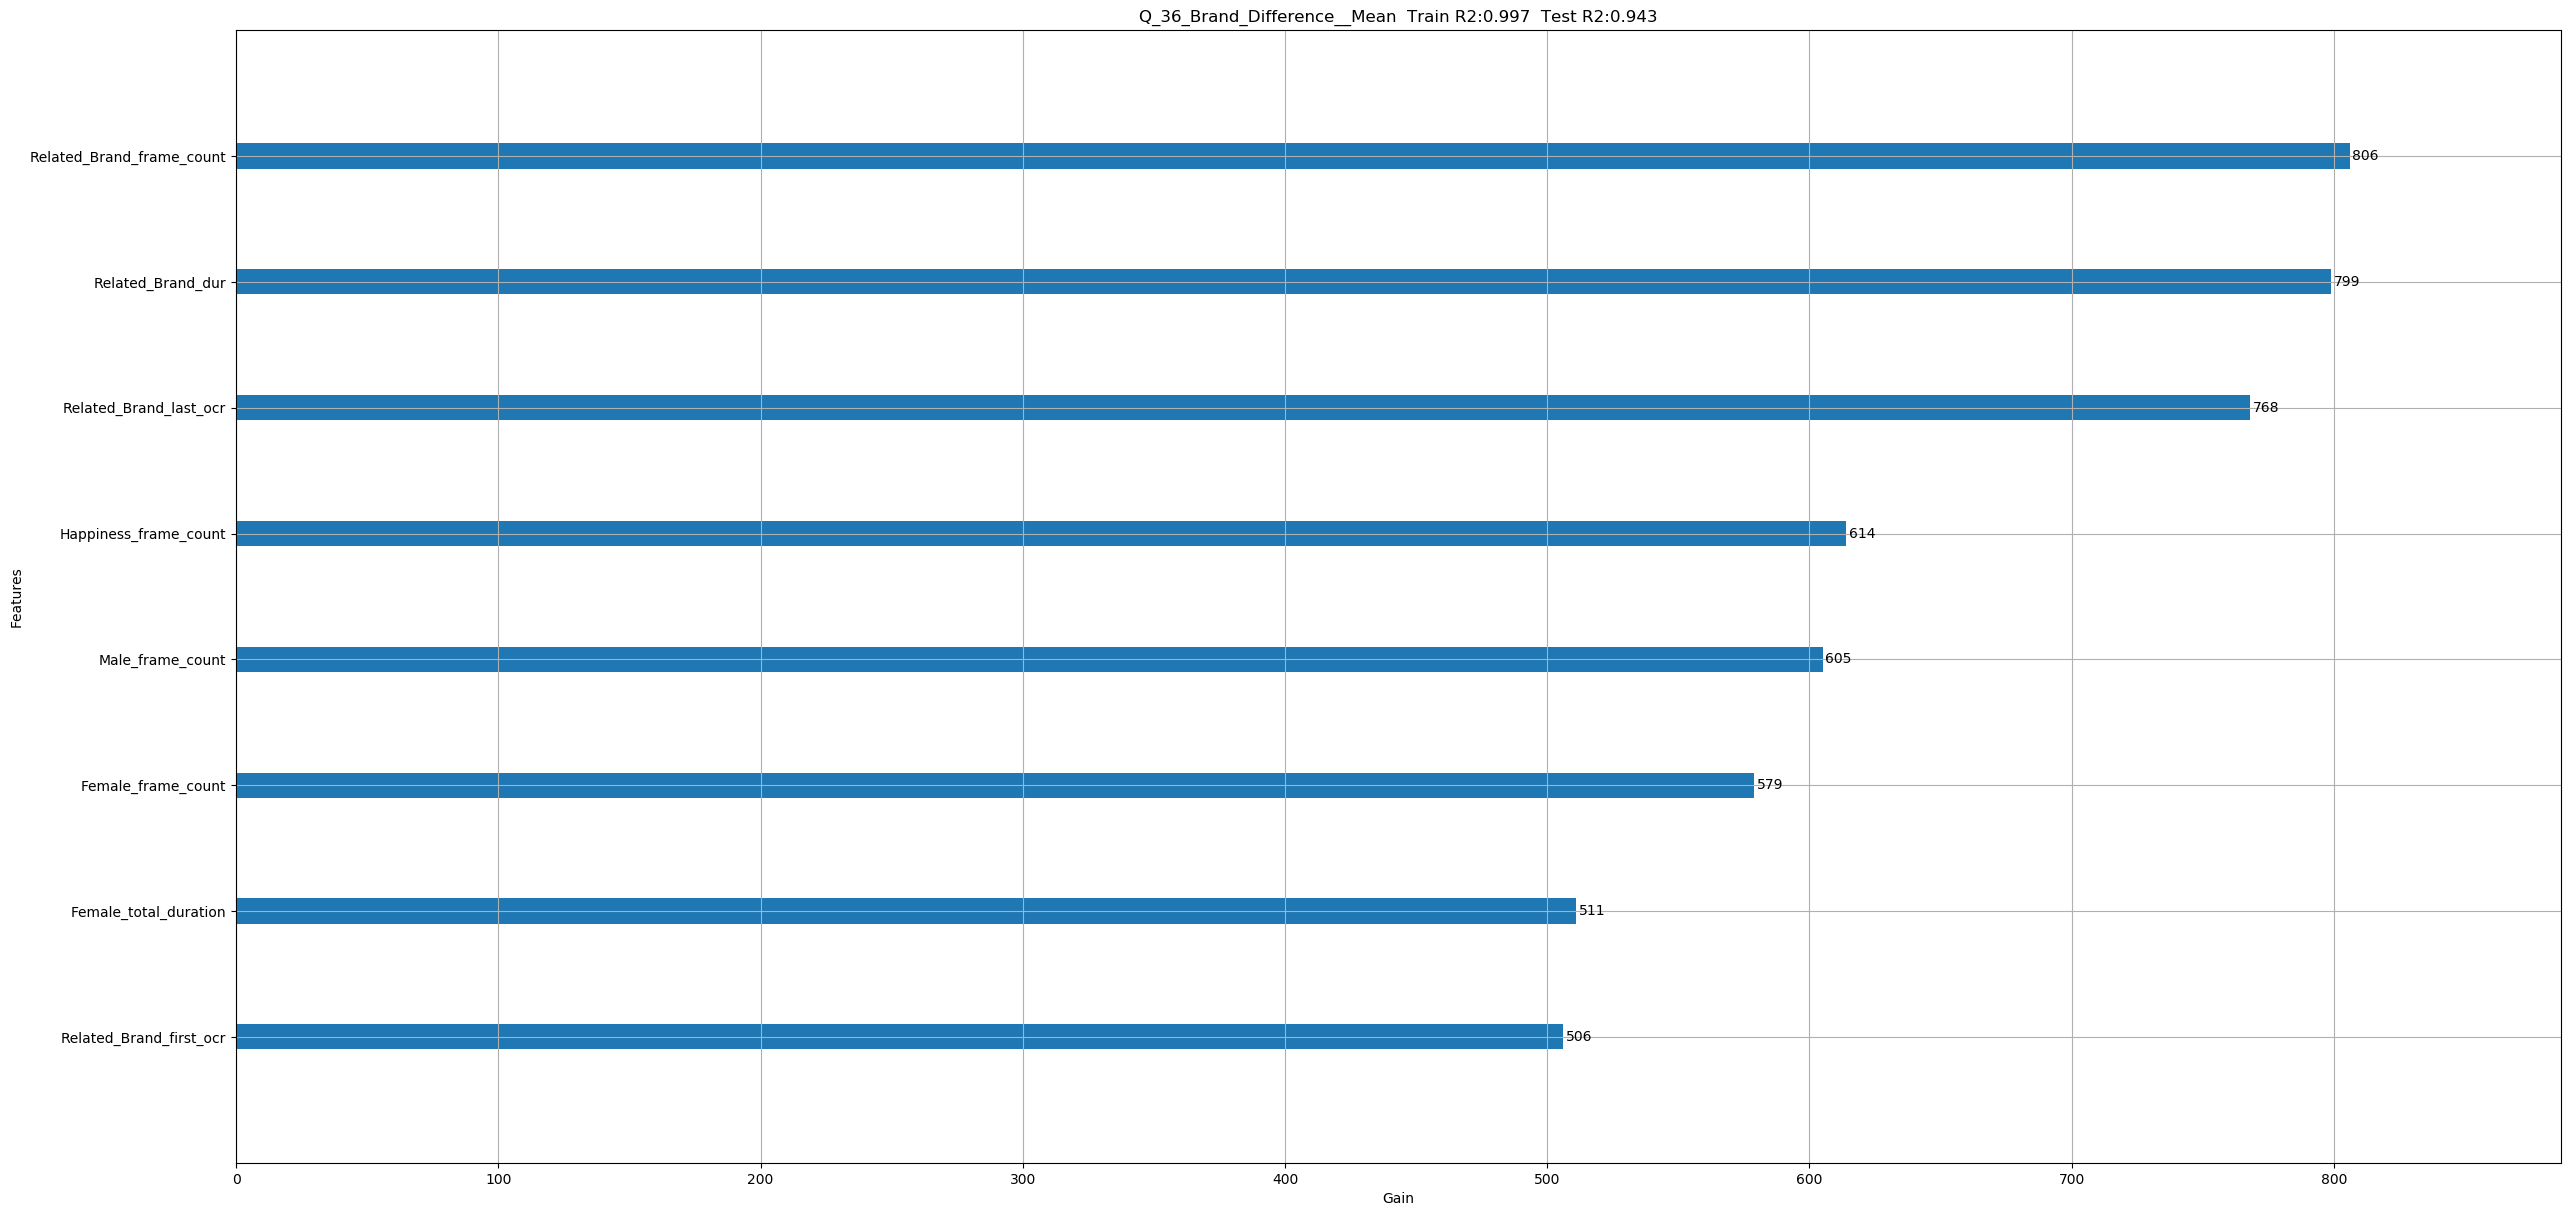

In [681]:

for i in range(len(resamp_target_df.columns)):
    try:
#         if i==9:
            print(resamp_target_df.columns[i])
            X, y = resamp_inputs_df.drop('Video_name',1),resamp_target_df[resamp_target_df.columns[i]]
            data_dmatrix = xgb.DMatrix(data=X,label=y)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

            xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree=training_params[i]['colsample_bytree'],max_depth=training_params[i]['max_depth'],
                                     n_estimators=training_params[i]['n_estimators'],min_samples_leaf=training_params[i]['min_samples_leaf'],
                                     silent = training_params[i]['silent'],alpha=training_params[i]['alpha'],
                                      learning_rate=training_params[i]['learning_rate'],n_jobs=-1,reg_lambda=training_params[i]['reg_lambda'],verbose=1)
#             xg_reg = xgb.XGBRegressor()

            ####  
#             print("Search starts")
#             hyper_tuning = GridSearchCV(xg_reg,param_grid=parameters_learning,cv=3,return_train_score=True,verbose=1,n_jobs=-1)
#             hyper_tuning.fit(X_train,y_train)
#             print(hyper_tuning.best_params_)
#             print("Search End")
            ###
            xg_reg.fit(X_train,y_train)
            preds = xg_reg.predict(X_train)
            r2_score_train = r2_score(y_train, preds)
            print("R2_SCORE (training set): %f" % r2_score_train)
            preds = xg_reg.predict(X_test)
            r2_score_test = r2_score(y_test, preds)
            print("R2_SCORE (test set): %f" % r2_score_test)
            xgb.plot_importance(xg_reg,max_num_features = 8,xlabel='Gain',title =resamp_target_df.columns[i]+ '  Train R2:' + str(round(r2_score_train,3)) + '  Test R2:' + str(round(r2_score_test,3)) )
            plt.rcParams['figure.figsize'] = [30,15]
            plt.rcParams['figure.dpi'] = 100
            matplotlib.rcParams.update({'font.size': 22})
            plt.savefig(resamp_target_df.columns[i]+'_XGB_Plot.png')
            plt.show()
    except:
        print("No score for " + resamp_target_df.columns[i])
        pass

In [633]:
print(xg_reg)

XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=1, min_samples_leaf=2, missing=None,
       n_estimators=700, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1,
       seed=None, silent=False, subsample=1, verbose=1)


<h1> Random Forest Model

In [31]:
#####
parameters={"n_estimators":[100,150,200,250,300,400,500],"max_depth":[2,4,5,6,13,14,15,18,20],"max_features":[0.25,0.3,0.4],"min_samples_leaf":[2,3],"bootstrap":[True,False]}

In [32]:
Unaided_Branding_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
Brand_mean_cues_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 250}
Aided_Branding__Mean_params ={'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
Active_Involvement__Mean_params = {'bootstrap': False, 'max_depth': 14, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 300}
New_Information__Mean_params = {'bootstrap': False, 'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2, 'n_estimators': 200}
Enjoyment__Mean_params= {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
Brand_Appeal__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
Understanding__Mean_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 150}
Relevance_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 150}
Credibility_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
Brand_Difference__Mean_params= {'bootstrap': False, 'max_depth': 13, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 400}

In [33]:
training_params_random_forest=[Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,Active_Involvement__Mean_params,New_Information__Mean_params,Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,New_Information__Mean_params,Brand_Difference__Mean_params]

In [34]:
X.columns

Index(['Software', 'Length_of_ad_15', 'Ad_type_tv',
       'Related_Brand_frame_count', 'Related_Brand_dur',
       'Related_Brand_first_ocr', 'Related_Brand_last_ocr',
       'Related_Brand_total_ocr', 'Female_frame_count', 'Male_frame_count',
       ...
       'Neutral_Male_frame_count', 'Happiness_Age_0_5_frame_count',
       'Neutral_Age_25_34_frame_count', 'Happiness_Eastasian_frame_count',
       'Surprise_Eastasian_frame_count', 'Asus_frame_count',
       'Dell_frame_count', 'Hp_frame_count', 'Lenovo_frame_count',
       'Lenovo_dur'],
      dtype='object', length=117)

Unaided_Branding
R2_SCORE (training set): 0.998640
R2_SCORE (test set): 0.965423
Feature ranking:
1. Related_Brand_dur (0.239785)
2. Lenovo_frame_count (0.150395)
3. Macbook Air_frame_count (0.052153)
4. Macbook Air_dur (0.034293)
5. Hp_frame_count (0.026258)
6. Windows_dur (0.026119)
7. HP Spectre x360, Windows_frame_count (0.023493)
8. Related_Brand_first_ocr (0.022609)
9. Dell_frame_count (0.021545)
10. Windows 10_last_ocr (0.017153)
11. Windows_frame_count (0.016721)
12. Unrelated_last_ocr (0.016708)
13. Female_total_duration (0.016558)
14. Latino_total_duration (0.016528)
15. HP Spectre x360, Windows_dur (0.015523)
16. Software (0.014758)
17. Surface Pen_frame_count (0.013374)
18. Ad_type_tv (0.011737)
19. Video_name (0.010503)
20. Related_Brand_last_ocr (0.009486)
21. Fear_frame_count (0.009304)
22. Age_15_24_frame_count (0.009300)
23. Surface Pen_dur (0.009218)
24. Windows 10_first_ocr (0.008970)
25. Yoga_dur (0.008832)
26. Related_Brand_frame_count (0.008656)
27. Female_frame_c

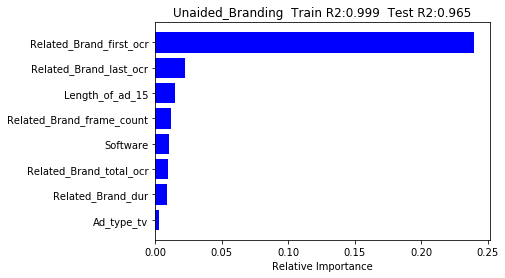

Q_12_Brand_Cues__Mean
R2_SCORE (training set): 0.993801
R2_SCORE (test set): 0.882112
Feature ranking:
1. Female_total_duration (0.088159)
2. Female_frame_count (0.064318)
3. Related_Brand_first_ocr (0.058842)
4. Related_Brand_dur (0.047715)
5. Related_Brand_frame_count (0.047645)
6. Happiness_Age_0_5_frame_count (0.038605)
7. Ad_type_tv (0.037788)
8. Surprise_total_duration (0.033559)
9. Related_Brand_last_ocr (0.032261)
10. Latino_frame_count (0.031614)
11. Yoga_dur (0.030284)
12. Age_15_24_total_duration (0.029115)
13. Age_15_24_frame_count (0.028425)
14. Windows 10_first_ocr (0.026779)
15. Lenovo_frame_count (0.026020)
16. Surprise_Eastasian_frame_count (0.019252)
17. Yoga_frame_count (0.015624)
18. Age_0_5_frame_count (0.015333)
19. Unrelated_total_ocr (0.015288)
20. Age_0_5_total_duration (0.013865)
21. Happiness_frame_count (0.011016)
22. Latino_total_duration (0.010629)
23. Surface Pen_frame_count (0.010102)
24. Unrelated_dur (0.009411)
25. African_total_duration (0.009380)
26.

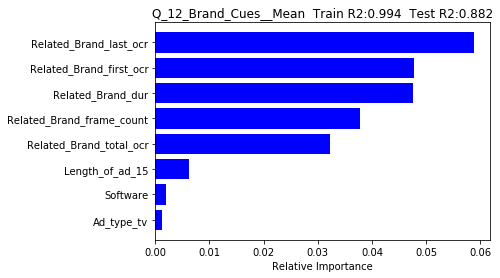

Q_11a_Aided_Branding__Mean
R2_SCORE (training set): 0.994228
R2_SCORE (test set): 0.884280
Feature ranking:
1. Lenovo_frame_count (0.142653)
2. Related_Brand_first_ocr (0.078922)
3. Windows_dur (0.043482)
4. Surprise_Eastasian_frame_count (0.042279)
5. Windows_frame_count (0.039019)
6. Yoga_frame_count (0.037212)
7. Unrelated_total_ocr (0.035095)
8. HP Spectre x360_frame_count (0.030539)
9. Fear_frame_count (0.024513)
10. Related_Brand_dur (0.023793)
11. Age_15_24_frame_count (0.021686)
12. Female_frame_count (0.020515)
13. HP Spectre x360_dur (0.019684)
14. Age_15_24_total_duration (0.018957)
15. Female_total_duration (0.018784)
16. HP Spectre x360, Windows_frame_count (0.017930)
17. Fear_total_duration (0.016831)
18. Surprise_total_duration (0.015944)
19. Windows 10_first_ocr (0.015099)
20. Related_Brand_last_ocr (0.014111)
21. Macbook Air_dur (0.013987)
22. Latino_frame_count (0.012300)
23. Happiness_total_duration (0.011382)
24. Asus_frame_count (0.011148)
25. ASUS T102_frame_count

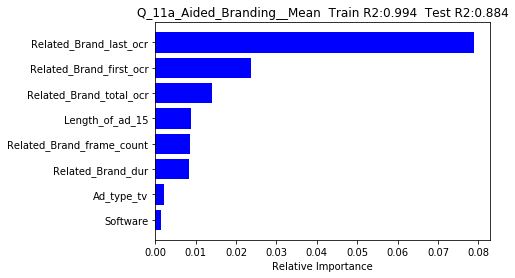

Q_7_8_9_Active_Involvement__Mean
R2_SCORE (training set): 0.997398
R2_SCORE (test set): 0.939885
Feature ranking:
1. Latino_frame_count (0.122921)
2. Surprise_total_duration (0.091781)
3. Related_Brand_first_ocr (0.072898)
4. Video_name (0.059388)
5. Software (0.055557)
6. Yoga_dur (0.033147)
7. Windows_frame_count (0.032796)
8. Ad_type_tv (0.032237)
9. Related_Brand_frame_count (0.030322)
10. Windows 10_first_ocr (0.027880)
11. Windows_dur (0.027259)
12. Related_Brand_dur (0.026989)
13. Windows 10_last_ocr (0.026032)
14. African_total_duration (0.021352)
15. Age_15_24_frame_count (0.018283)
16. Surface Pen_frame_count (0.015605)
17. Windows 10 PC_frame_count (0.015402)
18. Age_15_24_total_duration (0.014984)
19. Surface Pen_dur (0.014834)
20. African_frame_count (0.014611)
21. Windows 10 PC_dur (0.014533)
22. Lenovo_frame_count (0.014377)
23. Surprise_Male_frame_count (0.013411)
24. Caucasian_frame_count (0.011650)
25. Female_frame_count (0.011296)
26. Caucasian_total_duration (0.0109

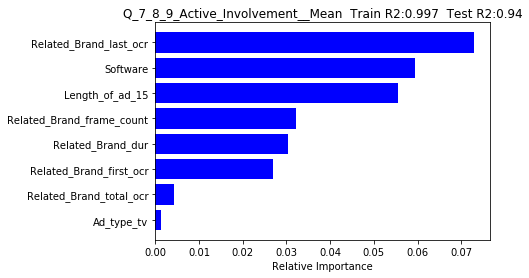

Q_35_New_Information__Mean
R2_SCORE (training set): 0.997955
R2_SCORE (test set): 0.931809
Feature ranking:
1. Video_name (0.125171)
2. Related_Brand_first_ocr (0.111083)
3. Windows 10_first_ocr (0.059382)
4. Windows_frame_count (0.056205)
5. Surprise_total_duration (0.050698)
6. Yoga_dur (0.038912)
7. Latino_frame_count (0.038273)
8. Software (0.037593)
9. Windows_dur (0.036440)
10. Windows 10_last_ocr (0.027403)
11. African_frame_count (0.019075)
12. Windows 10_total_ocr (0.016996)
13. Hp_frame_count (0.016741)
14. Surprise_Male_frame_count (0.016545)
15. Age_25_34_frame_count (0.015736)
16. African_total_duration (0.015663)
17. Age_25_34_total_duration (0.015504)
18. Lenovo_frame_count (0.015418)
19. Fear_total_duration (0.014530)
20. HP Spectre x360, Windows_dur (0.013531)
21. Related_Brand_last_ocr (0.012894)
22. HP Spectre x360, Windows_frame_count (0.012874)
23. Surface Pen_dur (0.012748)
24. Fear_frame_count (0.012652)
25. Surface Pen_frame_count (0.012641)
26. Happiness_Age_0_

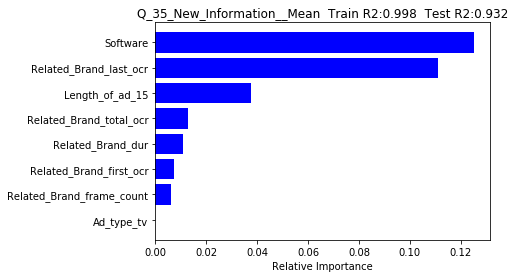

Q_6_Enjoyment__Mean
R2_SCORE (training set): 0.997266
R2_SCORE (test set): 0.912955
Feature ranking:
1. Related_Brand_first_ocr (0.227727)
2. Software (0.129371)
3. Related_Brand_dur (0.081274)
4. Microsoft Surface_dur (0.048777)
5. Microsoft Surface_frame_count (0.043907)
6. Unrelated_first_ocr (0.023629)
7. African_total_duration (0.022533)
8. Fear_total_duration (0.021352)
9. Age_15_24_total_duration (0.020278)
10. African_frame_count (0.019419)
11. Age_15_24_frame_count (0.018584)
12. Fear_frame_count (0.018299)
13. Surface Pen_frame_count (0.012281)
14. Happiness_frame_count (0.011822)
15. Windows_frame_count (0.011629)
16. Windows_dur (0.011560)
17. Surface Pen_dur (0.011210)
18. Neutral_Age_25_34_frame_count (0.010549)
19. Unrelated_dur (0.009967)
20. Related_Brand_last_ocr (0.009793)
21. Happiness_total_duration (0.009579)
22. Neutral_frame_count (0.008787)
23. Windows 10_first_ocr (0.008410)
24. Happiness_Age_0_5_frame_count (0.007682)
25. Neutral_total_duration (0.007109)
26.

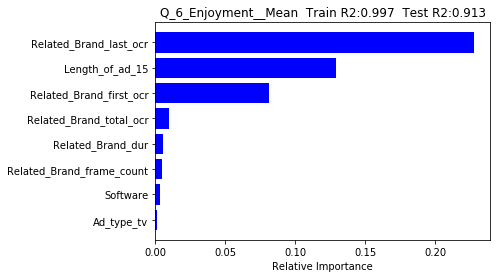

Q_20_Brand_Appeal__Mean
R2_SCORE (training set): 0.997956
R2_SCORE (test set): 0.919554
Feature ranking:
1. Related_Brand_first_ocr (0.155165)
2. Software (0.121848)
3. Video_name (0.052239)
4. Microsoft Surface_dur (0.038774)
5. Microsoft Surface_frame_count (0.037840)
6. African_total_duration (0.032752)
7. African_frame_count (0.032218)
8. Related_Brand_dur (0.025660)
9. Windows 10_first_ocr (0.025124)
10. Surprise_total_duration (0.023806)
11. Latino_frame_count (0.023562)
12. Surface Pen_frame_count (0.023406)
13. Surface Pen_dur (0.023242)
14. Happiness_Age_0_5_frame_count (0.015925)
15. Female_frame_count (0.014540)
16. Yoga_dur (0.013654)
17. Windows_frame_count (0.013334)
18. Female_total_duration (0.012858)
19. Unrelated_first_ocr (0.012580)
20. Windows_dur (0.012568)
21. Age_25_34_total_duration (0.011430)
22. Fear_total_duration (0.010733)
23. Age_25_34_frame_count (0.010634)
24. Fear_frame_count (0.010374)
25. Ad_type_tv (0.009929)
26. Related_Brand_frame_count (0.009696)


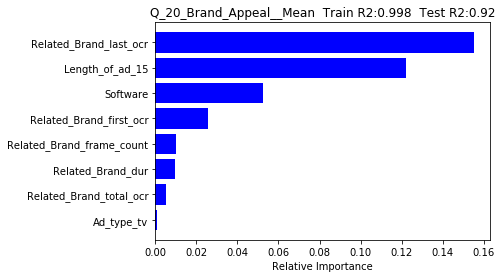

Q_32_Understanding__Mean
R2_SCORE (training set): 0.996146
R2_SCORE (test set): 0.891976
Feature ranking:
1. Surface pro 4_dur (0.063959)
2. Surface pro 4_frame_count (0.058087)
3. Related_Brand_frame_count (0.048027)
4. Windows 10, HP_Spectre_dur (0.040748)
5. Windows 10_total_ocr (0.036537)
6. Windows 10, HP_Spectre_frame_count (0.036462)
7. Ad_type_tv (0.035137)
8. Female_frame_count (0.031680)
9. Related_Brand_dur (0.027496)
10. Female_total_duration (0.026756)
11. Yoga_dur (0.026722)
12. HP Spectre x360_frame_count (0.024871)
13. HP Spectre x360, Windows_frame_count (0.021741)
14. Surface Pen_frame_count (0.021559)
15. Related_Brand_first_ocr (0.020133)
16. Happiness_total_duration (0.019721)
17. Happiness_frame_count (0.019134)
18. HP Spectre x360_dur (0.019063)
19. Surface Pen_dur (0.018974)
20. Related_Brand_last_ocr (0.018434)
21. Age_0_5_total_duration (0.017900)
22. Hp_frame_count (0.016677)
23. Lenovo_frame_count (0.016613)
24. Age_0_5_frame_count (0.016147)
25. Happiness_A

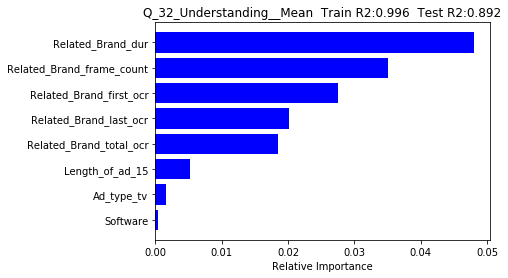

Q_33_Relevance_of_Information__Mean
R2_SCORE (training set): 0.996186
R2_SCORE (test set): 0.836265
Feature ranking:
1. Related_Brand_first_ocr (0.099216)
2. Related_Brand_dur (0.052181)
3. Software (0.047613)
4. Yoga_frame_count (0.040778)
5. Fear_total_duration (0.037773)
6. Surprise_Eastasian_frame_count (0.032440)
7. Fear_frame_count (0.031226)
8. Unrelated_total_ocr (0.027989)
9. Windows 10_first_ocr (0.026148)
10. Unrelated_last_ocr (0.025417)
11. Female_frame_count (0.025259)
12. Latino_frame_count (0.025036)
13. Neutral_Age_25_34_frame_count (0.020829)
14. Unrelated_first_ocr (0.020773)
15. Age_0_5_frame_count (0.019130)
16. African_frame_count (0.019049)
17. Surprise_total_duration (0.019020)
18. Yoga_dur (0.017861)
19. Age_15_24_total_duration (0.017540)
20. Female_total_duration (0.017030)
21. African_total_duration (0.016915)
22. Happiness_Age_0_5_frame_count (0.016661)
23. Male_frame_count (0.016362)
24. Age_15_24_frame_count (0.015423)
25. Related_Brand_frame_count (0.015

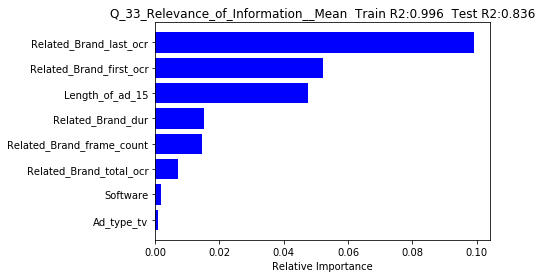

Q_34_Credibility_of_Information__Mean
R2_SCORE (training set): 0.992463
R2_SCORE (test set): 0.890749
Feature ranking:
1. Windows 10, HP_Spectre_frame_count (0.082079)
2. Windows 10, HP_Spectre_dur (0.075356)
3. Related_Brand_first_ocr (0.072710)
4. Unrelated_first_ocr (0.063289)
5. Ad_type_tv (0.037043)
6. Related_Brand_frame_count (0.031902)
7. Related_Brand_last_ocr (0.027230)
8. Related_Brand_dur (0.023882)
9. HP Spectre x360_frame_count (0.022591)
10. Latino_total_duration (0.021782)
11. Surface pro 4_frame_count (0.019807)
12. Unrelated_last_ocr (0.017874)
13. Fear_frame_count (0.017306)
14. Yoga_dur (0.016790)
15. Surface pro 4_dur (0.016190)
16. Age_15_24_total_duration (0.014627)
17. Happiness_Age_0_5_frame_count (0.014277)
18. Windows_dur (0.014136)
19. Fear_total_duration (0.014083)
20. Windows 10 PC_frame_count (0.014029)
21. Female_frame_count (0.012923)
22. Happiness_total_duration (0.012182)
23. Female_total_duration (0.012084)
24. Happiness_frame_count (0.011682)
25. Wi

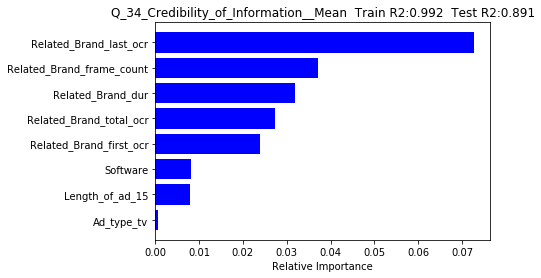

Q_35_New_Information__Mean.1
R2_SCORE (training set): 0.997970
R2_SCORE (test set): 0.932233
Feature ranking:
1. Video_name (0.142760)
2. Related_Brand_first_ocr (0.120577)
3. Windows 10_first_ocr (0.049012)
4. Windows_frame_count (0.045357)
5. Latino_frame_count (0.042106)
6. Surprise_total_duration (0.042103)
7. Yoga_dur (0.035325)
8. Windows_dur (0.034703)
9. Software (0.034586)
10. Windows 10_last_ocr (0.033841)
11. African_frame_count (0.020920)
12. African_total_duration (0.019082)
13. Age_25_34_total_duration (0.016429)
14. HP Spectre x360, Windows_frame_count (0.016108)
15. Related_Brand_last_ocr (0.015625)
16. Lenovo_frame_count (0.015269)
17. Surprise_Male_frame_count (0.015203)
18. HP Spectre x360, Windows_dur (0.015187)
19. Windows 10_total_ocr (0.015069)
20. Age_25_34_frame_count (0.014349)
21. Fear_total_duration (0.013782)
22. Hp_frame_count (0.013629)
23. Fear_frame_count (0.013410)
24. Surface Pen_dur (0.012068)
25. Happiness_Age_0_5_frame_count (0.011947)
26. Surface 

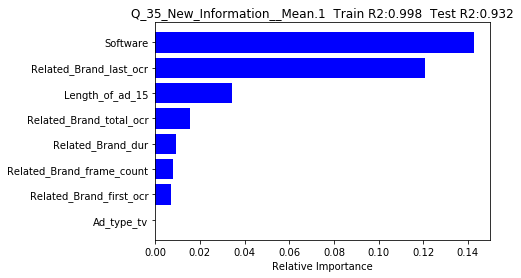

Q_36_Brand_Difference__Mean
R2_SCORE (training set): 0.998038
R2_SCORE (test set): 0.945091
Feature ranking:
1. Related_Brand_first_ocr (0.179442)
2. Software (0.101660)
3. African_total_duration (0.056396)
4. African_frame_count (0.053934)
5. Surprise_total_duration (0.034472)
6. Latino_frame_count (0.029406)
7. Windows 10_first_ocr (0.028570)
8. Yoga_dur (0.027625)
9. Windows_dur (0.026734)
10. Video_name (0.025036)
11. Windows_frame_count (0.023687)
12. Windows 10_last_ocr (0.021877)
13. Related_Brand_dur (0.019944)
14. Surprise_Male_frame_count (0.014602)
15. Age_0_5_frame_count (0.014018)
16. Age_0_5_total_duration (0.013407)
17. Happiness_Age_0_5_frame_count (0.013319)
18. Lenovo_frame_count (0.013232)
19. Surface pro 4_dur (0.009027)
20. Age_15_24_frame_count (0.008360)
21. Fear_frame_count (0.007845)
22. Fear_total_duration (0.007693)
23. Related_Brand_last_ocr (0.007436)
24. Surface pro 4_frame_count (0.007160)
25. Surface Pen_frame_count (0.007142)
26. Female_total_duration (

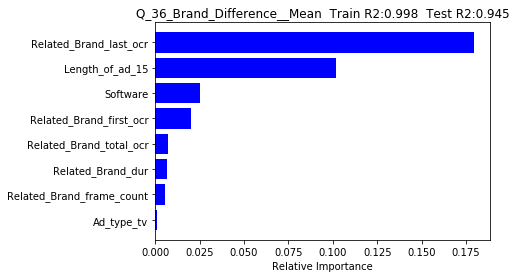

In [37]:

for i in range(len(resamp_target_df.columns)):
    print(resamp_target_df.columns[i])
    X, y = resamp_inputs_df.drop('Video_name',1),resamp_target_df[resamp_target_df.columns[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    forest = RandomForestRegressor()
    #### Grid Search CV
#     print("Search starts")
#     hyper_tuning = GridSearchCV(forest,param_grid=parameters,cv=3,return_train_score=True,verbose=1,n_jobs=-1)
#     hyper_tuning.fit(X_train,y_train)
#     print(hyper_tuning.best_params_)
#     print("Search End")
    ####
    forest.set_params(**training_params_random_forest[i])
#     X_train, X_cross, y_train, y_cross = train_test_split(X, y, test_size=0.1, random_state=123)
    forest.fit(X_train, y_train)
    preds = forest.predict(X_train)
    r2_score_train = r2_score(y_train, preds)
    print("R2_SCORE (training set): %f" % (r2_score_train))
    preds = forest.predict(X_test)
    r2_score_test = r2_score(y_test, preds)
    print("R2_SCORE (test set): %f" % (r2_score_test))
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, resamp_inputs_df.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    features = X.columns[0:8]
    importances = forest.feature_importances_[0:8]
    indices = np.argsort(importances)

    plt.title(resamp_target_df.columns[i] + '  Train R2:' + str(round(r2_score_train,3)) + '  Test R2:' + str(round(r2_score_test,3)))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.savefig(resamp_target_df.columns[i]+'_Random_Forest_Plot.png')
    plt.show()
#     plt.figure(figsize=(20,20))
#     plt.title("Feature importances")
#     plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
#     plt.xticks(range(X.shape[1]), indices)
#     plt.xlim([-1, X.shape[1]])
#     plt.savefig(resamp_target_df.columns[i]+'.png')
#     plt.show()

In [107]:
forest

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=13,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)